# Проект: Обучение с учителем: качество модели.

Интернет-магазин «В один клик» хочет увеличить активность постоянных клиентов, так как привлекать новых стало труднее из-за насыщенности рынка. Отдел цифровых технологий должен разработать решение для персонализации предложений и увеличения покупательской активности клиентов.

**Цели проекта:** 
- Создать модель предсказывающую вероятность снижения покупательской активности клиента в следующие три месяца.
- Выделить сегменты покупателей и разработать для них персонализированные предложения, чтобы увеличить их покупательскую активность.

Для выполнения задачи у нас есть следующие данные:
1) Таблица `market_file.csv` содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- `id` — номер покупателя в корпоративной базе данных.
- `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
- `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

2) Таблица `market_money.csv`, с данными о выручке, которую получает магазин с покупателя.
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксирована выручка. 
- `Выручка` — сумма выручки за период.

3) Таблица `market_time.csv` с данными о времени, которое покупатель провёл на сайте в течение периода.
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксировано общее время.
- `минут` — значение времени, проведённого на сайте, в минутах.

4) Таблица `money.csv` с данными о среднемесячной прибыли покупателя за последние 3 месяца.
- `id` — номер покупателя в корпоративной базе данных.
- `Прибыль` — значение прибыли.

**План работы:**

1. Загрузим данные и проведем первичное ознакомление с ними.

2. Этап предобработки данных: проверим данные на наличие пропущенных значений. Обработаем явные и неявные дубликаты.

3. Этап исследовательского анализа данных: изучим распределения данных в нашей выборке, обработаем аномальные значения при необходимости. На основе данных о выручке выберем клиентов с покупательской активностью не менее трех месяцев.

4. Объединим данные в один датафрейм для дальнейшей работы. Проведем корреляционный анализ двнных и примем решение о корректировке обучающих признаков.

5. Подбор лучшей модели: обучим несколько меделей для предсказания категориальной переменной и выберем наиболее точную.

6. Анализ и интерпретация модели: выявим признаки, указывающие на снижение покупательской активности.

6. Сегментация покупателей: на основе данных о работе модели выявим сегменты покупателей и составим предложения по повышению их покупательской активности.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных." data-toc-modified-id="Загрузка-данных.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных.</a></span></li><li><span><a href="#Предобработка-данных." data-toc-modified-id="Предобработка-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных.</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Проведем-исследовательский-анализ-данных-из-каждой-таблицы." data-toc-modified-id="Проведем-исследовательский-анализ-данных-из-каждой-таблицы.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проведем исследовательский анализ данных из каждой таблицы.</a></span></li><li><span><a href="#Отберем-клиентов-с-покупательской-активностью-не-менее-трёх-месяцев." data-toc-modified-id="Отберем-клиентов-с-покупательской-активностью-не-менее-трёх-месяцев.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Отберем клиентов с покупательской активностью не менее трёх месяцев.</a></span></li><li><span><a href="#Выводы." data-toc-modified-id="Выводы.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выводы.</a></span></li></ul></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Объединение таблиц</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Использование-пайплайнов" data-toc-modified-id="Использование-пайплайнов-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Использование пайплайнов</a></span><ul class="toc-item"><li><span><a href="#Выберем-лучшую-модель." data-toc-modified-id="Выберем-лучшую-модель.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Выберем лучшую модель.</a></span></li><li><span><a href="#Донастройка-лучшей-модели." data-toc-modified-id="Донастройка-лучшей-модели.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Донастройка лучшей модели.</a></span></li></ul></li><li><span><a href="#Анализ-важности-признаков" data-toc-modified-id="Анализ-важности-признаков-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Анализ важности признаков</a></span></li><li><span><a href="#Сегментация-покупателей" data-toc-modified-id="Сегментация-покупателей-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Сегментация покупателей</a></span><ul class="toc-item"><li><span><a href="#Клиенты,-покупательская-активность-которых-вероятнее-всего-снизится-и-которые-дали-согласие-на-коммуникацию-с-сервисом." data-toc-modified-id="Клиенты,-покупательская-активность-которых-вероятнее-всего-снизится-и-которые-дали-согласие-на-коммуникацию-с-сервисом.-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Клиенты, покупательская активность которых вероятнее всего снизится и которые дали согласие на коммуникацию с сервисом.</a></span></li><li><span><a href="#Клиенты,-которые-имеют-большое-число-отложенных-в-корзину-товаров-и-чаще-всего-совершают-покупки-по-акции." data-toc-modified-id="Клиенты,-которые-имеют-большое-число-отложенных-в-корзину-товаров-и-чаще-всего-совершают-покупки-по-акции.-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Клиенты, которые имеют большое число отложенных в корзину товаров и чаще всего совершают покупки по акции.</a></span></li><li><span><a href="#Клиенты,-которые-приносили-сервису-наибольшую-прибыль-последние-три-месяца." data-toc-modified-id="Клиенты,-которые-приносили-сервису-наибольшую-прибыль-последние-три-месяца.-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Клиенты, которые приносили сервису наибольшую прибыль последние три месяца.</a></span></li><li><span><a href="#Выводы-о-сегментах." data-toc-modified-id="Выводы-о-сегментах.-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Выводы о сегментах.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Инициализация.

### Импортируем необходимые библиотеки.

In [1]:
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn
!pip install shap==0.44.0

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import (train_test_split,
                                     RandomizedSearchCV)

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import (LabelEncoder,
                                   OneHotEncoder, 
                                   OrdinalEncoder, 
                                   StandardScaler, 
                                   MinMaxScaler,
                                   PolynomialFeatures)

from sklearn.feature_selection import (SelectKBest, 
                                       f_classif, 
                                       mutual_info_classif)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.metrics import (roc_auc_score, 
                             f1_score, 
                             confusion_matrix, 
                             RocCurveDisplay,
                             precision_score, 
                             recall_score,
                             precision_recall_curve)

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Объявим константы.

In [3]:
RANDOM_STATE = 77

### Создадим функции для дальнейшей работы.

In [4]:
def format_dataset(data):
    data.columns = data.columns.str.lower().str.replace(' ', '_')
    obj_cols = data.select_dtypes(include=['object']).columns
    data[obj_cols] = data[obj_cols].apply(lambda x: x.str.lower().str.replace(' ', '_'))
    data[obj_cols] = data[obj_cols].apply(lambda x: x.str.strip())

In [5]:
def check_duplicates(df, df_name):
    full_duplicates = df.duplicated().sum()
    id_duplicates = df["id"].duplicated().sum()
    return f'Полных дубликатов в таблице "{df_name}": {full_duplicates}; Дублирующихся значений id: {id_duplicates}'

In [6]:
def impl_duplicates(data):
    return {col: data[col].unique() for col in data.select_dtypes(include=['object']).columns}

In [7]:
def num_cols_analysis (data, column):
    fig, axs = plt.subplots(2, figsize=(8, 10))
    fig.suptitle(f'Анализ значений столбца "{column}"')
    
    axs[0].hist(data[column], bins=30)
    axs[0].set_xlabel(f'Значения "{column}"')
    axs[0].set_ylabel('Частота')
    axs[0].grid(True)
        
    axs[1].boxplot(data[column])
    axs[1].set_ylabel(f'Значения "{column}"')
    axs[1].grid(True)
        
    plt.tight_layout()
    plt.show()

In [8]:
def normal_range (data, column):
    try:
        describe_column = data[column].describe()
        IQR = (describe_column['75%'] - describe_column['25%']) * 1.5
        normal_min = round(describe_column['25%'] - IQR, 2)
        normal_max = round(describe_column['75%'] + IQR, 2)
        if normal_min < data[column].min():
            normal_min = round(data[column].min(), 2)
        elif normal_max > data[column].max():
            normal_max = round(data[column].max(), 2)
        return normal_min, normal_max
    except:
        pass

In [9]:
def cat_cols_analysis (data, column):
    plt.title(f'Соотношение признаков в столбце {column}')
    data[column].value_counts().plot(kind='pie', autopct='%1.0f%%')
    plt.ylabel('')
    plt.show()
    return data[column].value_counts()

In [10]:
def discret_values_analysis (data, column):
    data[column].value_counts().plot(kind='bar', figsize=(8, 5))
    plt.title(f'Анализ значений столбца "{column}"')
    plt.xlabel(f'Значения "{column}"')
    plt.ylabel('Частота')
    plt.grid()
    plt.show()

## Загрузка данных.

Загрузим данные и изучим общую информацию о датасетах. 

In [11]:
market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')

In [12]:
market_file.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [13]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [14]:
market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')

In [15]:
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [16]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [17]:
market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')

In [18]:
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [19]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [20]:
money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';', decimal=',')

In [21]:
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [22]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


Пропущенные значения отсутствуют. Значения в столбцах соотвествуют описанию, все данные отображаются корректно. Тип данных соотвествует содержащейся в столбцах информации.

## Предобработка данных.

Выполним предобработку данных: проверим наличие явных и неявных дубликатов.

Для начала исправим наименования столбцов и строковых данных: приведем все буквы к нижнему регистру, заполним пробелы нижним подчеркиванием. 

In [23]:
datasets = [market_file, market_money, market_time, money]
list(map(format_dataset, datasets))
market_file.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,снизилась,премиум,да,3.4,5,121,0.00,товары_для_детей,6,2,1,5
1,215349,снизилась,премиум,да,4.4,4,819,0.75,товары_для_детей,4,4,2,5
2,215350,снизилась,стандартт,нет,4.9,3,539,0.14,домашний_текстиль,5,2,1,5
3,215351,снизилась,стандартт,да,3.2,5,896,0.99,товары_для_детей,5,0,6,4
4,215352,снизилась,стандартт,нет,5.1,3,1064,0.94,товары_для_детей,3,2,3,2


Исследуем данные на наличие явных дубликатов.

Во всех наших датасетах имеются значения id - уникального идентификатора каждого пользователя. Чтобы проверить, не дублируется ли информация о пользователе, найдем полные дубликаты в наших датасетах. Чтобы убедиться, что значения id дейтсивтельно уникальны, проверим дубликаты только по столбцу id.

In [24]:
data_names = ['market_file', 'market_money', 'market_time', 'money']

for df, name in zip(datasets, data_names):
    display(check_duplicates(df, name))

'Полных дубликатов в таблице "market_file": 0; Дублирующихся значений id: 0'

'Полных дубликатов в таблице "market_money": 0; Дублирующихся значений id: 2600'

'Полных дубликатов в таблице "market_time": 0; Дублирующихся значений id: 1300'

'Полных дубликатов в таблице "money": 0; Дублирующихся значений id: 0'

Полные дубликаты отсутствуют, при этом в датасетах `market_money`, `market_time` имеются дублирующиеся записи с одним и тем же номером id: информация об одном пользователе может быть указана за разные периоды времени. Рассмотрим пдробнее за какие периоды были сделаны наблюдения в этих датасетах.

In [25]:
market_money['период'].value_counts()

период
препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: count, dtype: int64

In [26]:
market_time['период'].value_counts()

период
текущий_месяц       1300
предыдцщий_месяц    1300
Name: count, dtype: int64

В таблице `market_money` собраны данные за последние три месяца: текущий месяц, предыдущий месяц и предпредыдущий месяц. В таблице `market_time` - наблюдения за два последних месяца: текущий и предыдущий. 

Таким образом все сходится: в нашем распоряжении данные о 1300 клиентах онлайн-магазина, при этом данные о прибыли собраны за три последних месяца, данные о времени, проведенном на сайте - за два последних месяца и ни одного проусщенного значения.

Перейдем к исследованию неявных дубликатов в наших датасетах.

In [27]:
impl_duplicates(market_file)

{'покупательская_активность': array(['снизилась', 'прежний_уровень'], dtype=object),
 'тип_сервиса': array(['премиум', 'стандартт', 'стандарт'], dtype=object),
 'разрешить_сообщать': array(['да', 'нет'], dtype=object),
 'популярная_категория': array(['товары_для_детей', 'домашний_текстиль', 'косметика_и_аксесуары',
        'техника_для_красоты_и_здоровья', 'кухонная_посуда',
        'мелкая_бытовая_техника_и_электроника'], dtype=object)}

Категория "стандарт" в столбце `тип_сервиса` дублируется с ошибкой, также ошибка имеется в категории `косметика_и_аксесуары`. Исправим эти значения.

In [28]:
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')

In [29]:
market_file['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

Дубликаты в столбце устранены.

In [30]:
market_file['популярная_категория'] = market_file['популярная_категория'].replace('косметика_и_аксесуары', 'косметика_и_аксессуары')

In [31]:
market_file['популярная_категория'].unique()

array(['товары_для_детей', 'домашний_текстиль', 'косметика_и_аксессуары',
       'техника_для_красоты_и_здоровья', 'кухонная_посуда',
       'мелкая_бытовая_техника_и_электроника'], dtype=object)

Ошибочное наименование исправлено. Перейдем к датасетам `market_money` и `market_time`: еще раз рассмотрим уникальные значения периодов, за которые собраны данные в этих датасетах.

In [32]:
impl_duplicates(market_money)

{'период': array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
       dtype=object)}

In [33]:
impl_duplicates(market_time)

{'период': array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)}

Исправим ошибку в категории, описывающей позапрошлый месяцв датасете `market_money` и значение "предыдцщий_месяц" в датасете `market_time`.

In [34]:
market_money['период'] = market_money['период'].replace('препредыдущий_месяц', 'предпредыдущий_месяц')
market_money['период'].unique()

array(['предпредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [35]:
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Ошибочные значения устранены. Неявные дубликаты в наших данных обработаны.

## Исследовательский анализ данных.

### Проведем исследовательский анализ данных из каждой таблицы. 

Проведем исследовательский анализ данных датасета `market_file`.

Целевой признак `покупательская_активность` в нашем исследовании представлен двумя классами: "прежний_уровень" и "снизилась". Изучим частоту встречаемости этих категорий в нашем датасете.

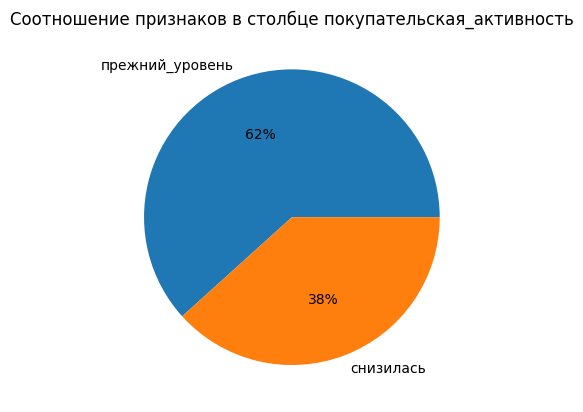

покупательская_активность
прежний_уровень    802
снизилась          498
Name: count, dtype: int64

In [36]:
cat_cols_analysis(market_file, 'покупательская_активность')

Соотношение категорий целевого признака далеко от равного: 62% против 38%. Учтем это при распределении данных на выборки.

Перейдем к столбцу `тип_сервиса`.

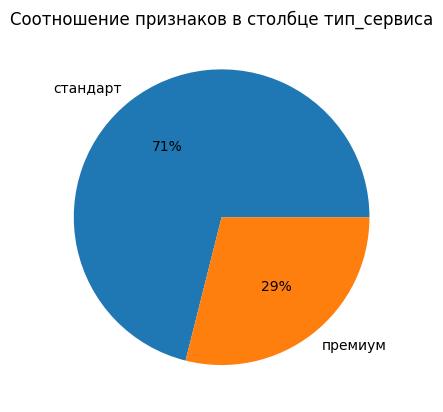

тип_сервиса
стандарт    924
премиум     376
Name: count, dtype: int64

In [37]:
cat_cols_analysis(market_file, 'тип_сервиса')

Тип сервиса представлен двумя классами: "стандарт" и "премиум", при этом частота встечаемости классов сильно различается: данные о клиентах с типом сервиса "премиум" занимают немногим больше 25% от общего числа наблюдений. Покупательская активность клиентов в этих категориях может сильно розниться, также как и заинтересованность магазина в удержании определенной категории покупателей. В данном случае требуется больше информации об особенностях премиум сервиса и о том, как клиент получает данную категорию. Узнаем, как распределен признак `покупательская активность` в группе клиентов с типом сервиса "премиум" и оценим необходимость сэмплирования данных.

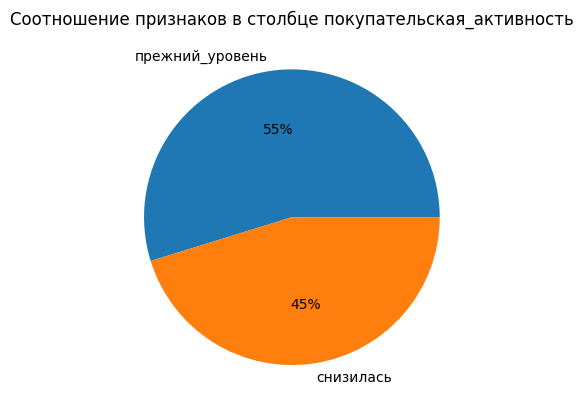

покупательская_активность
прежний_уровень    206
снизилась          170
Name: count, dtype: int64

In [38]:
cat_cols_analysis(market_file[market_file['тип_сервиса'] == 'премиум'], 'покупательская_активность')

Целевой признак в группе клиентов с типом сервиса "премиум" распределен практически равномерно, необходимости в сэмплировании данных по типу сервиса нет. 

Исследуем значения столбца `разрешить_сообщать`, которые отражают согласие клиента на получение дополнительных сообщений о товаре.

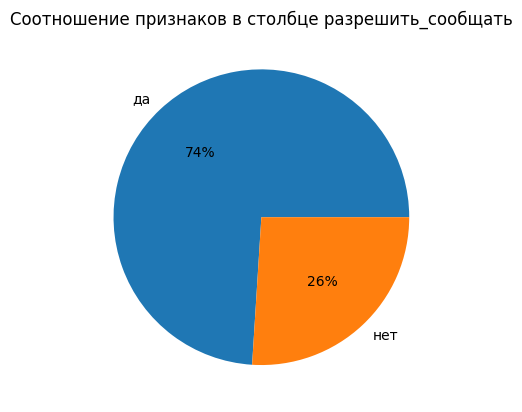

разрешить_сообщать
да     962
нет    338
Name: count, dtype: int64

In [39]:
cat_cols_analysis(market_file, 'разрешить_сообщать')

Данный признак так же может оказаться важным в предсказании покупательской активности клиентов: клиенты, не получающие дополнительных сообщений о товаре и об акциях могу менее активно пользоваться сервисом. Узнаем, как распределена покупательская активность у клиентов, не получающих дополнительные уведомления.

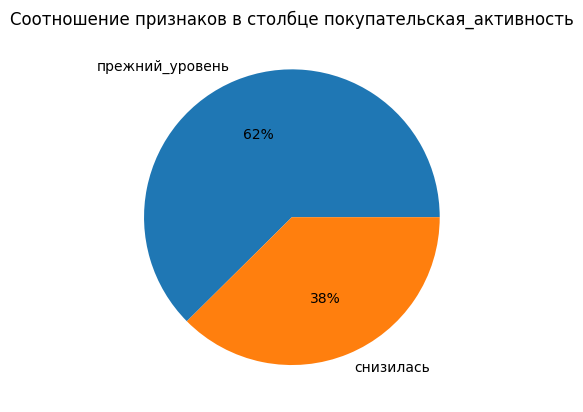

покупательская_активность
прежний_уровень    211
снизилась          127
Name: count, dtype: int64

In [40]:
cat_cols_analysis(market_file[market_file['разрешить_сообщать'] == 'нет'], 'покупательская_активность')

Выраженного дисбаланса по данному признаку также нет.

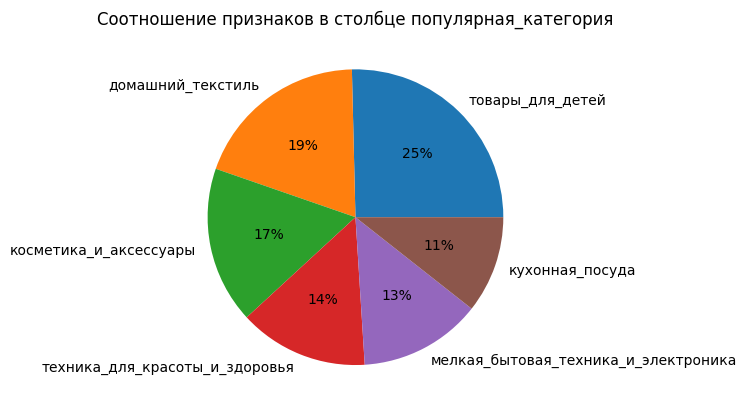

популярная_категория
товары_для_детей                        330
домашний_текстиль                       251
косметика_и_аксессуары                  223
техника_для_красоты_и_здоровья          184
мелкая_бытовая_техника_и_электроника    174
кухонная_посуда                         138
Name: count, dtype: int64

In [41]:
cat_cols_analysis(market_file, 'популярная_категория') 

Популярные категории представлены практически в равном соотношении, кроме превалирующей категории "товары для детей" и наименее популярной категории "кухонная посуда". Наименование популярной категории может помочь нам в решении задачи сегментации и построения персональных предложений для клиентов.

Перейдем к столбцам с количественными данными.

Рассмотрим значения столбца `маркет_актив_6_мес`, которое отражает среднее количество маркетинговых коммуникаций с клиентом за последние 6 месяцев.

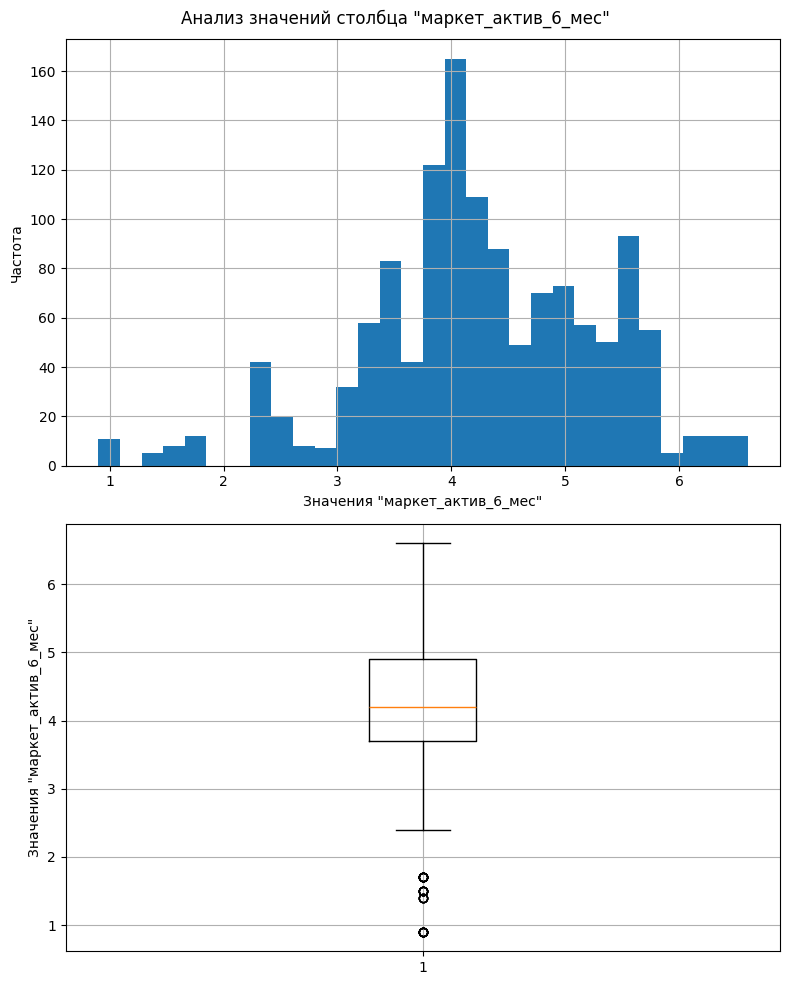

In [42]:
num_cols_analysis(market_file, 'маркет_актив_6_мес')

За последние 6 месяцем чаще всего клиенты имели около 4х маркетинговых коммуникаций в месяц. Диаграмма размаха указывает на наличие выбросов: клиенты, имевшие менее 2х маркетинговых коммуникаций в месяц выбиваются из общей тенденции распределения этого признака. Оценим долю наблюдений относящихся к выбросам.

In [43]:
len(market_file.query('маркет_актив_6_мес <= 2'))/ len(market_file) * 100

2.769230769230769

Выбросы составляют менее 3х процентов от всех данных. Оценим значения в столбце `маркет_актив_тек_мес` есть ли в данных этого столбца наблюдения с таким же низким количеством маркетинговых коммуникаций.

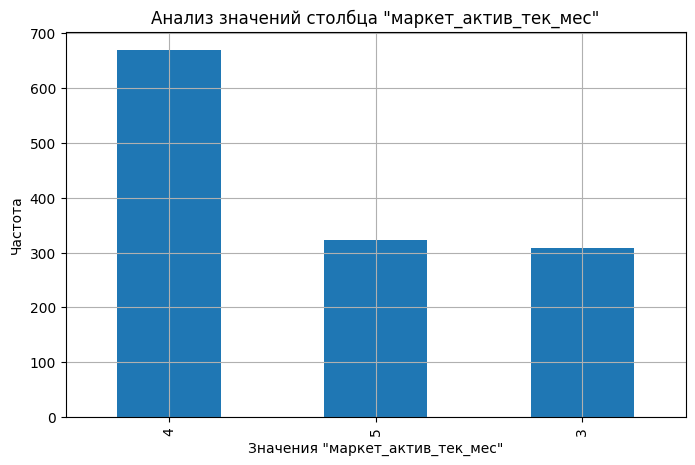

In [44]:
discret_values_analysis(market_file, 'маркет_актив_тек_мес')

Данные этого признака согласуются с данными столбца `маркет_актив_6_мес`: большая часть клиентов имела 4 маркетинговых контакта в текущем месяце.

В данных за текущий месяц нет ни одного клиента с количеством маркетинговых коммуникаций менее 3х. Оценим, к каким категориям "покупательской активности" относятся клиенты с исследуемыми аномалиями.

In [45]:
market_file.query('маркет_актив_6_мес <= 2')['покупательская_активность'].value_counts()

покупательская_активность
снизилась          34
прежний_уровень     2
Name: count, dtype: int64

Покупательская активность почти всех клиеннов из исследуемой группы снизилась. В таком случае, удалять эти строки не следует: таким образом мы уменьшим представленность мажорной категории нашей целевой переменной и можем получить менее точные или искаженные предсказания, так как модель не уловит возможную связь между этими признаками.

Перейдем к столбцу `длительность`: в нем содержатся данные о количестве дней с момента регистрации клиента на сайте.

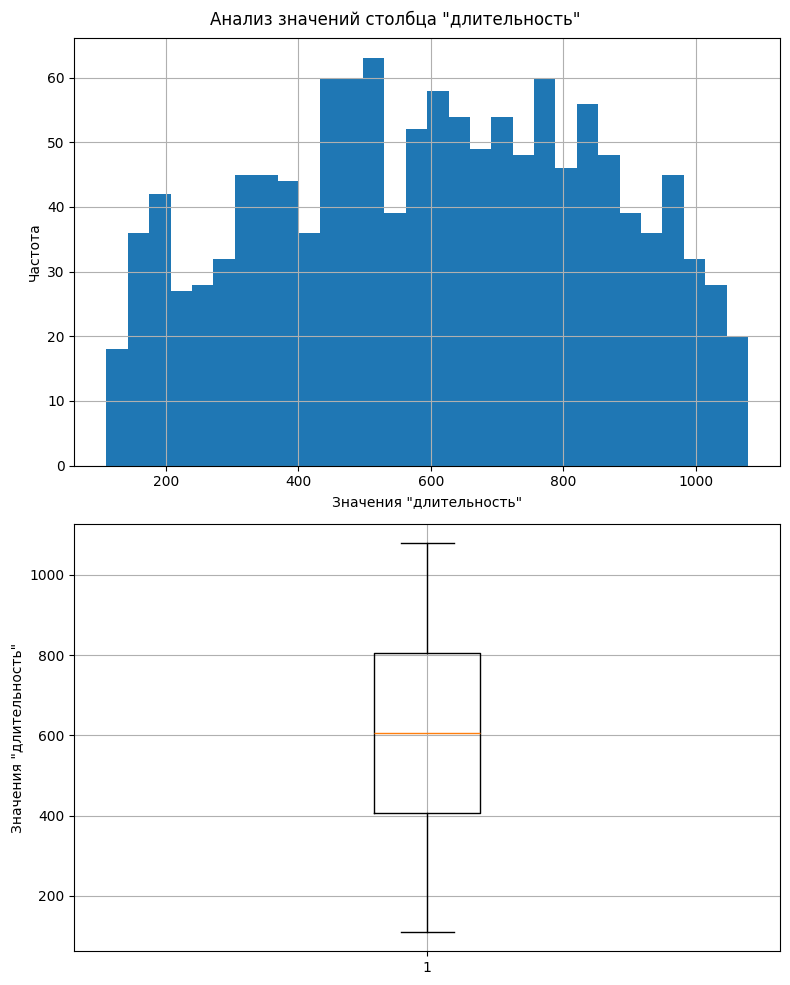

In [46]:
num_cols_analysis(market_file, 'длительность')

В датасете собрана информация как об относительно новых пользователях, зарегестрировавшихся около полугода назад, так и о клиентах, пользующихся сервисом уже в течение нескольких лет. Выбросы и аномалии по данному признаку отсутствуют.

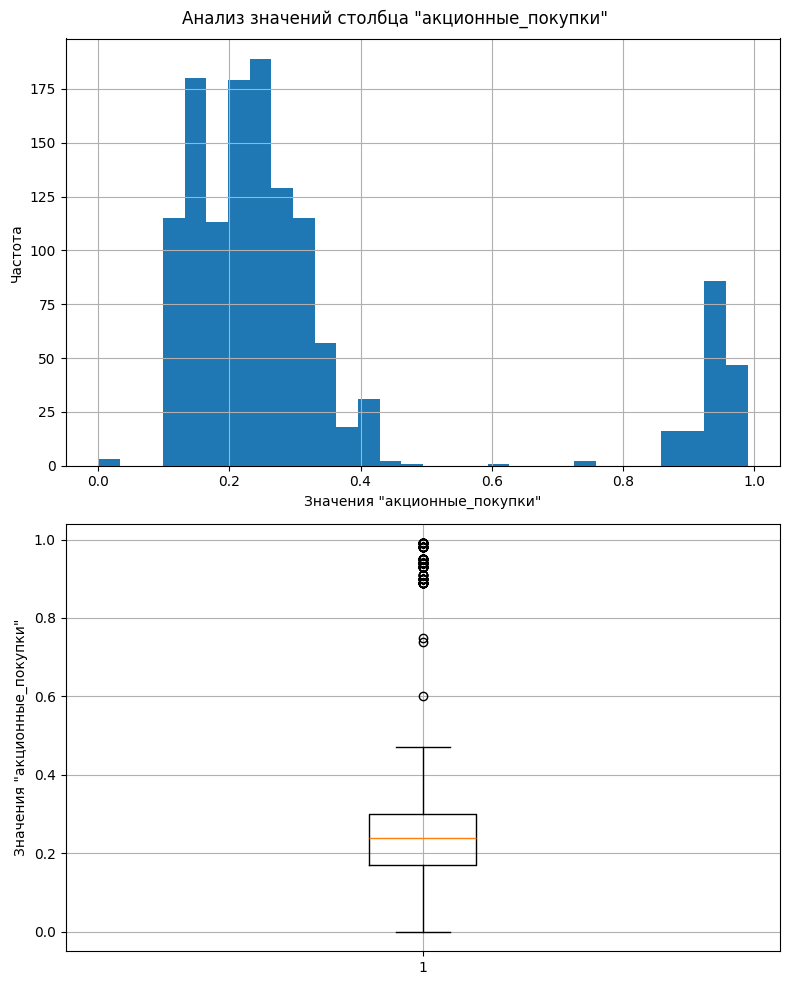

In [47]:
num_cols_analysis(market_file, 'акционные_покупки')

В столбце `акционные_покупки` отражена информация о среднемесячной доле покупок по акции за последние 6 месяцев. Для большей части пользователей это значение варьирует в диапозоне от 0.1 до 0.3, также у некоторых пользователей наблюдается тенденция к совершению покупок только в период действия акции: среднемесячная доля акционных товаров составляет около 0.9. Статистически часть значений относится к аномалиям, однако такое распределение значений отражает реальные тенденции потребительского поведения клиентов.

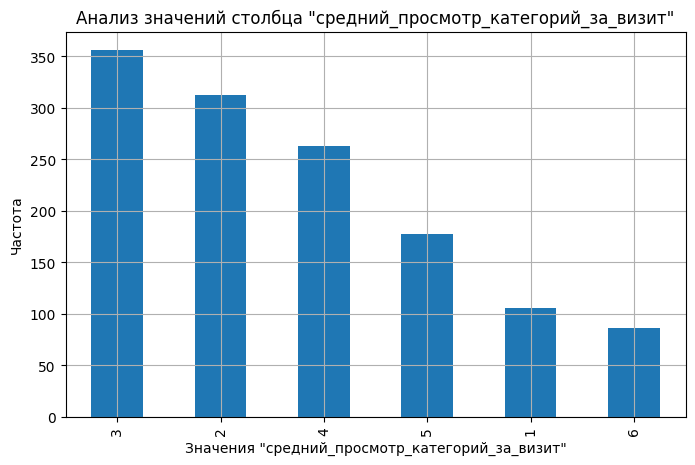

In [48]:
discret_values_analysis(market_file, 'средний_просмотр_категорий_за_визит')

Большинство клиентов за одиин визит просматривают от 2 до 4 категорий товаров. 

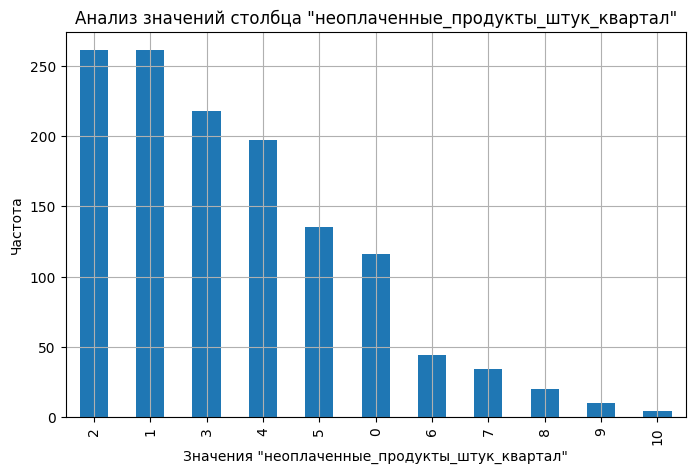

In [49]:
discret_values_analysis(market_file, 'неоплаченные_продукты_штук_квартал')

Чаще всего клиенты имеют 1-4 неоплаченных товаров в корзине.

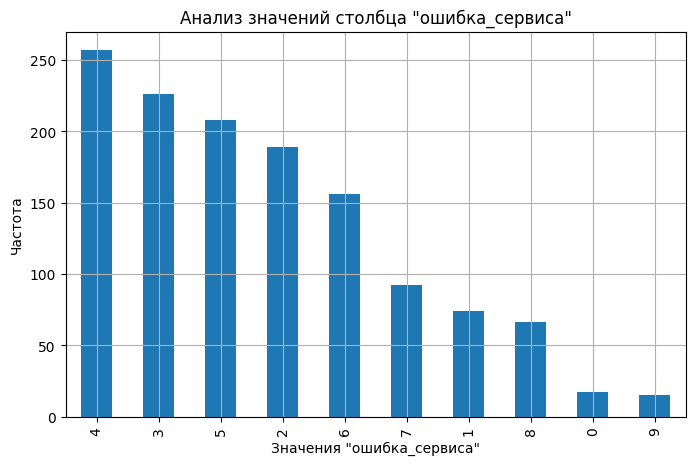

In [50]:
discret_values_analysis(market_file, 'ошибка_сервиса')

Большая часть клиентов сталкивается с 2-6 ошибками работы сервиса во время посещения сайта.

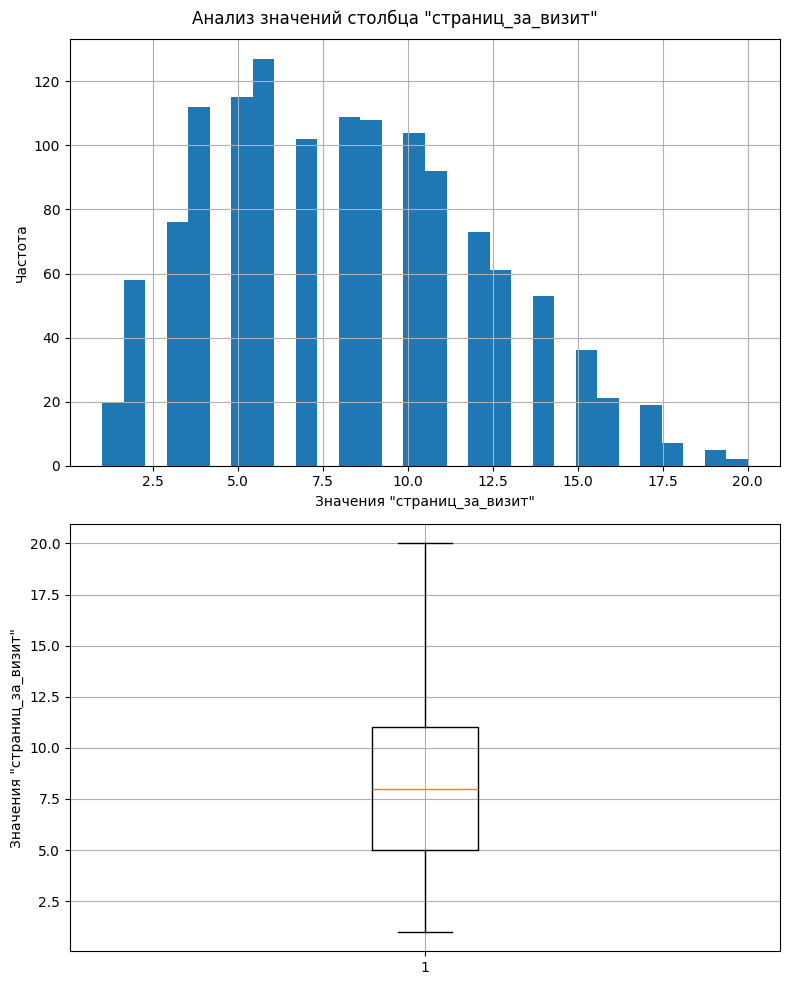

In [51]:
num_cols_analysis(market_file, 'страниц_за_визит')

Клиенты в среднем просматривают от 5 до 11 страниц товаров за визит.

Перейдем к таблице `market_time`. Мы уже косвенно касались вопроса количества наблюдений в каждом месяце, когда изучали дубликаты в нашем датасете. Рассмотрим подробнее этот вопрос и изучим распределение значений времени, проведенного клиентом на сайте за каждый представленный период.

In [52]:
market_time['период'].value_counts()

период
текущий_месяц       1300
предыдущий_месяц    1300
Name: count, dtype: int64

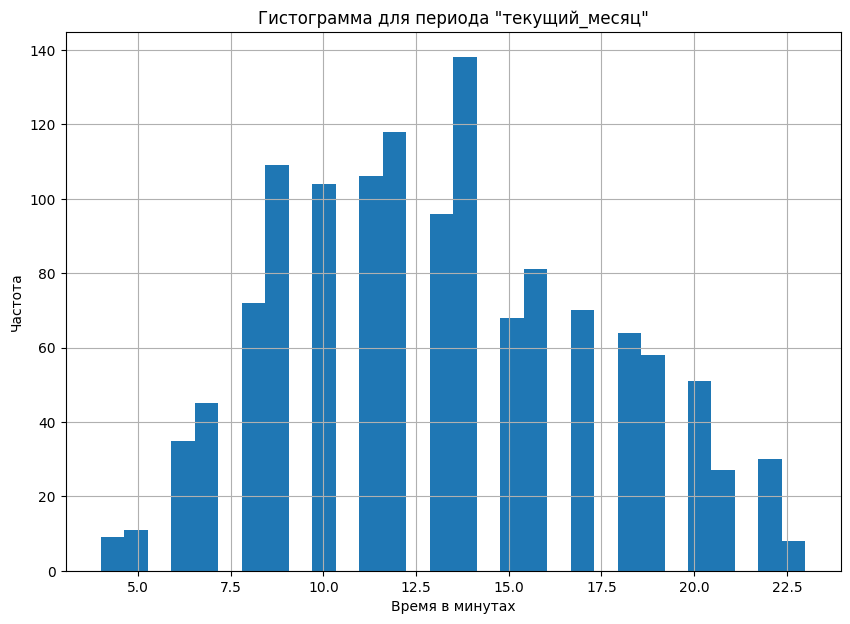

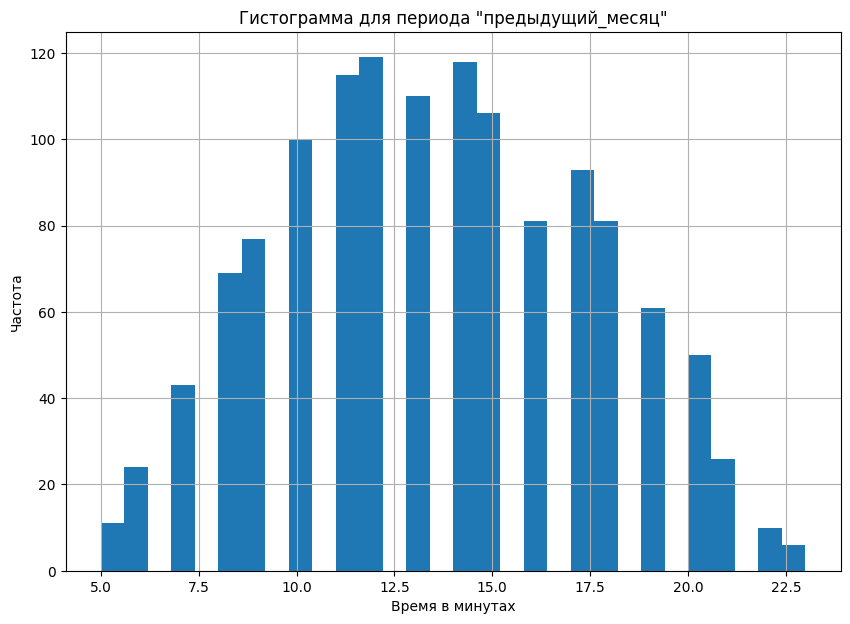

In [53]:
for period in market_time['период'].unique():
    market_time[market_time['период'] == period]['минут'].hist(bins=30, figsize=(10, 7))
    plt.title(f'Гистограмма для периода "{period}"')
    plt.xlabel('Время в минутах')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

В текущем и в предшествующем месяце клиенты проводили на сайте от 5 до 23 минут. В среднем, большинство клиентов проводят на сайте от 10 до 15 минут. 

Перейдем к таблице `market_money`. Проверим, сколько наблюдений имеется в данных за каждый представленный период. Изучим распределение значений выручки магазина с одного клиента за каждый месяц.

In [54]:
market_money['период'].value_counts()

период
предпредыдущий_месяц    1300
текущий_месяц           1300
предыдущий_месяц        1300
Name: count, dtype: int64

За каждый исследуемый период 1300 наблюдений (одно наблюдение на каждого клиента).

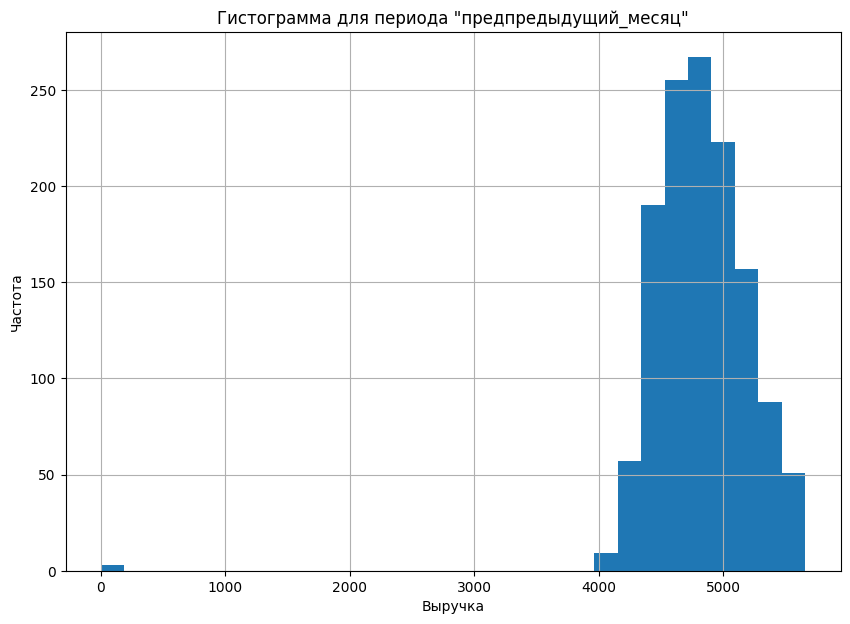

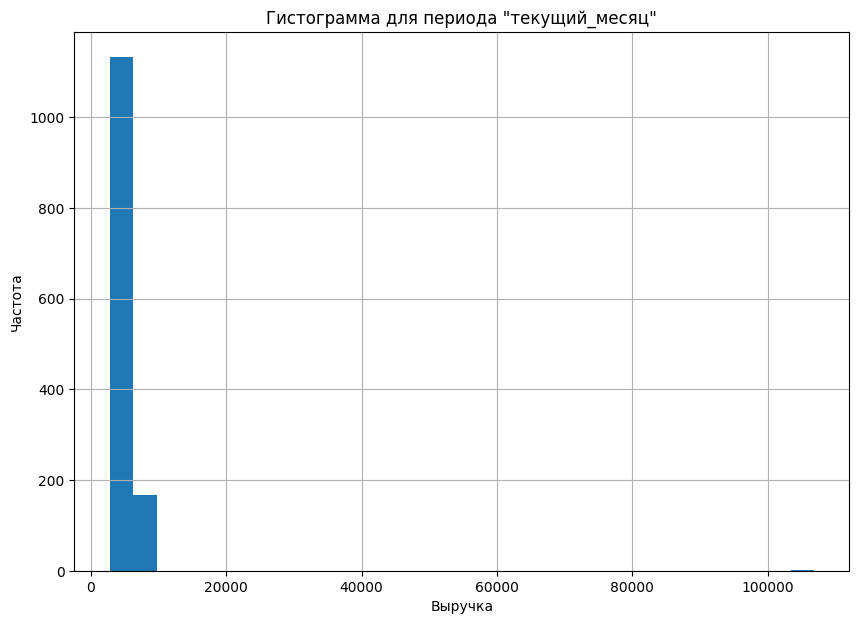

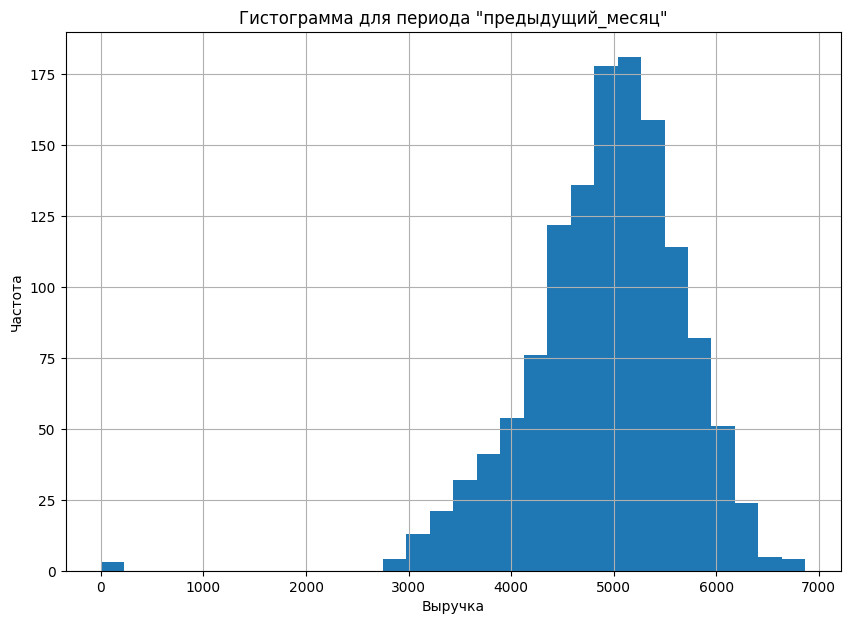

In [55]:
for period in market_money['период'].unique():
    market_money[market_money['период'] == period]['выручка'].hist(bins=30, figsize=(10, 7))
    plt.title(f'Гистограмма для периода "{period}"')
    plt.xlabel('Выручка')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

Проанализируем выбросы: 

На гистограмме за предпредыдущий и за предыдущий месяцы отражены данные о части пользователей, выручка от которых была равна нулю. Эти значения отражают реальное поведение части покупателей и не требуют корректировки. 

Значения выручки за текущий месяц содержат аномальное значение: более 100000 рублей за одного клиента. Рассмотрим подробнее эту строку.

In [56]:
client_id = market_money[(market_money['период'] == 'текущий_месяц') & (market_money['выручка'] > 100000)]['id'].iloc[0]

In [57]:
market_file[market_file['id'] == client_id]

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
32,215380,снизилась,премиум,нет,1.7,4,637,0.94,техника_для_красоты_и_здоровья,3,2,4,7


Популярная категория клиента - "техника_для_красоты_и_здоровья", а доля акционных покупок = 0.94. Вероятно, в данном случае клиент ожидал более выгодных условий для покупки дорогостоящего товара. Для нашего исследования такое наблюдение аномально: значение дохода от покупки сильно выбивается из общей статистики. Удалим наблюдения об этом клиенте из наших датасетов.

In [58]:
market_file.shape, market_money.shape, market_time.shape, money.shape

((1300, 13), (3900, 3), (2600, 3), (1300, 2))

In [59]:
market_file = market_file.drop(market_file[market_file['id'] == client_id].index)
market_money = market_money.drop(market_money[market_money['id'] == client_id].index)
market_time = market_time.drop(market_time[market_time['id'] == client_id].index)
money = money.drop(money[money['id'] == client_id].index)

In [60]:
market_file.shape, market_money.shape, market_time.shape, money.shape

((1299, 13), (3897, 3), (2598, 3), (1299, 2))

Данные о пользователе удалены. Вернемся к анализу значений выручки в разные периоды, построим обновленные гистограммы.

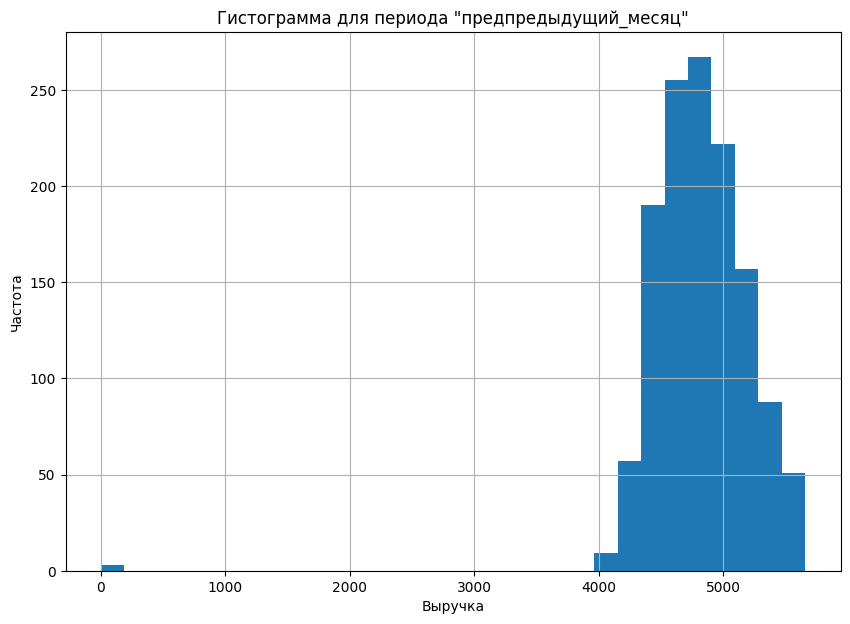

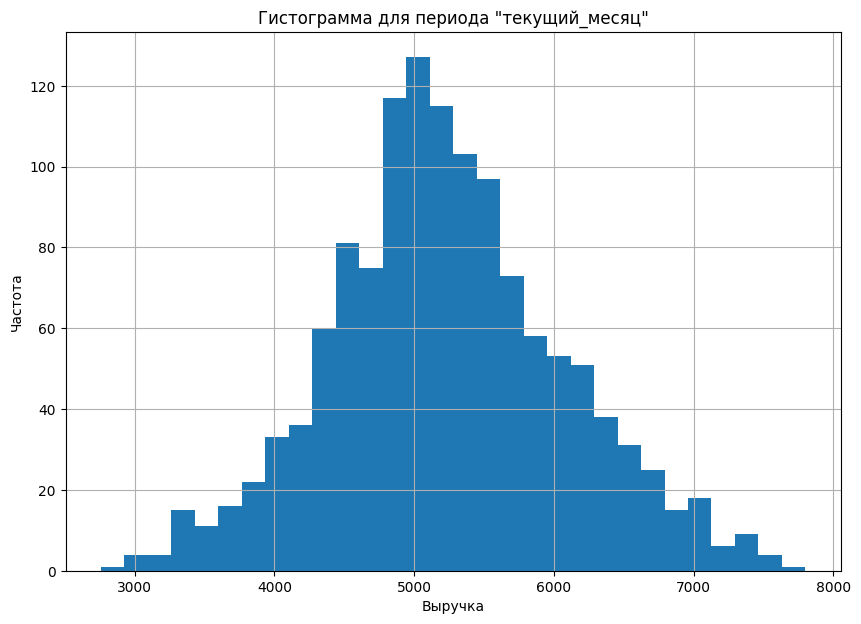

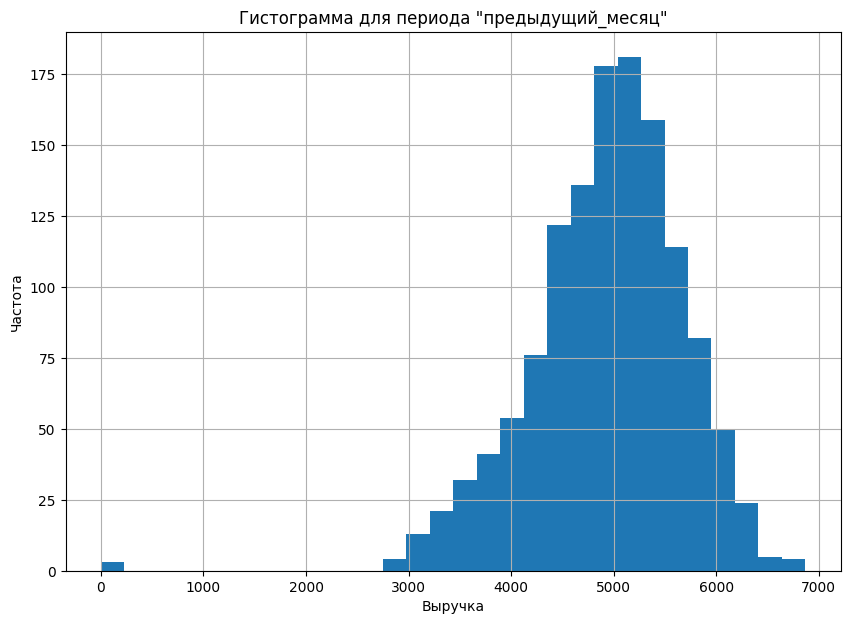

In [61]:
for period in market_money['период'].unique():
    market_money[market_money['период'] == period]['выручка'].hist(bins=30, figsize=(10, 7))
    plt.title(f'Гистограмма для периода "{period}"')
    plt.xlabel('Выручка')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

Максимальное значение выручки за предпредыдущий месяц меньше, чем за последующие рассматриваемые периоды, однако в целом распределения значений схожи в каждом месяце. Наиболее характерное значение месячной выручки магазина с одного клиента - около 5000 рублей, плюс-минус 500 рублей.

Исследуем данные о среднемесячной прибыли c покупателя за последние 3 месяца.

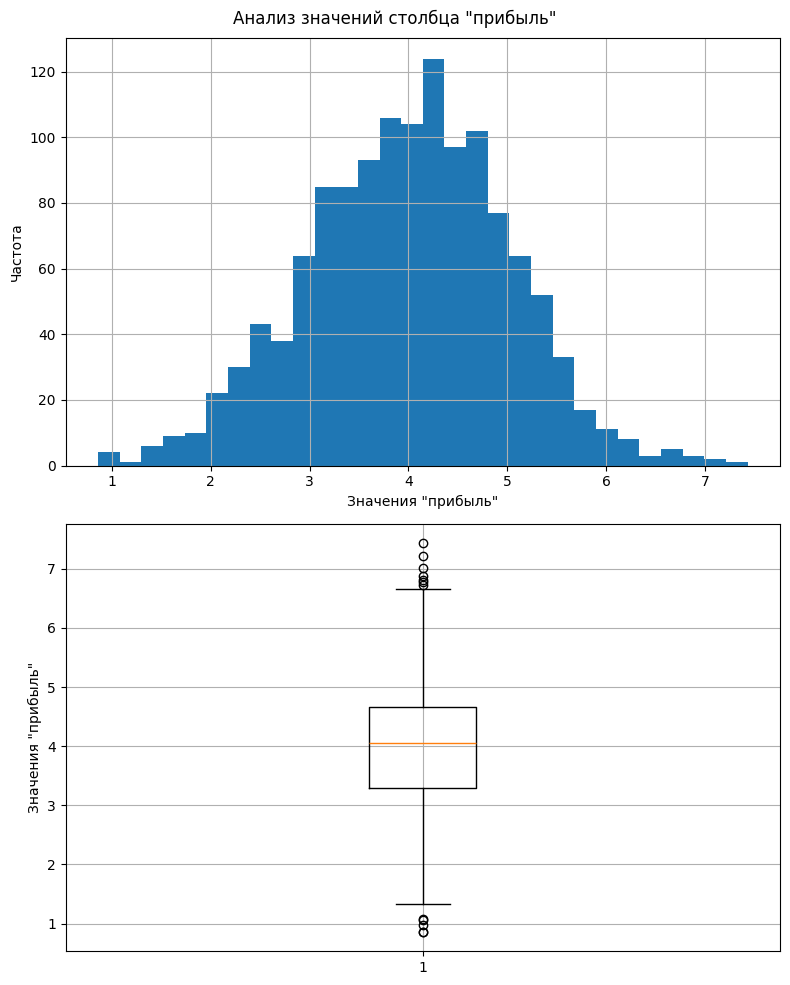

In [62]:
num_cols_analysis(money, 'прибыль')

Значения в столбце представлены натуральными числами. С учетом данных в датасете `market_money`, вероятнее всего эти числа отражают сумму в тысячах рублей.

В отличие от помесячных данных, где среднее значение прибыли составляло около 5 тысяч рублей, выручка за все три месяца от большей части клиентов сосредоточена в диапозоне меньших значений и составляет от 3 до 5 тысяч рублей. На диаграмме размаха мы можем наблюдать выбросы в виде более высоких и более низких значений выручки, однако они не представляют собой аномальные для исследования наблюдения и не требуют корректировки.

### Отберем клиентов с покупательской активностью не менее трёх месяцев.

Для построения прогнозных моделей нам потребуются данные о клиентах с покупательской активностью не менее трех месяцев. Выделим эту группу клиентов.

In [63]:
market_file = market_file[~market_file['id'].isin(market_money.query('выручка == 0')['id'].unique())]

Проверим размерность таблицы после исследовательского анализа данных.

In [64]:
market_file.shape

(1296, 13)

Мы удалили одного клиента с выручкой более 100000 рублей и выделили датасет с информацией об активных клиентах, в который вошли все клиенты, кроме трех.

### Выводы.

Итого, мы выявили неравенство классов целевого признака, что необходимо учесть при распределении данных на выборки.
Дисбаланс классов также наблюдается в признаке `тип сервиса`: клиентов с типом сервиса "Премиум" почти в три раза меньше, чем клиентов с типом сервиса "Стандарт". 
Мы обработали одно аномальное значение и ислючили из исследования трех клиентов с низкой покупательской  активностью.

Портет типичного пользователя сервисом:
- Предпочитает стандартный тип сервиса.
- Согласен на маркетинговые коммуникации.
- Чаще всего интересуется товарами для детей, домашним текстилем, косметикой и аксессуарами.
- В среднем, имеет около 4 маркетинговых коммуникаций в месяц.
- Пользуется сервисом уже несколько лет.
- Часто приобретает товары по акциям.
- Просматривает от 2 до 4 категорий товаров за визит и до 11 страниц товаров.
- Имеет 1-4 неоплаченных товара в корзине.
- Сталкивается с 2-6 ошибками во время посещений сайта.
- Проводит на сайте от 10 до 15 минут за визит.
- Вносит месячную выручку около 5000 рублей.

## Объединение таблиц.

Объединим таблицы `market_file`, `market_money`, `market_time`. 

In [65]:
m_money = market_money.pivot_table(index='id', columns='период')
m_money.columns=['выручка_за_предпредыдущий_месяц', 'выручка_за_предыдущий_месяц', 'выручка_за_текущий_месяц']

In [66]:
m_time = market_time.pivot_table(index='id', columns='период')
m_time.columns=['время_за_предыдущий_месяц', 'время_за_текущий_месяц']

In [67]:
market_file = market_file.set_index('id').join([m_money, m_time], how='left')

In [68]:
market_file.head(10)

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_за_предпредыдущий_месяц,выручка_за_предыдущий_месяц,выручка_за_текущий_месяц,время_за_предыдущий_месяц,время_за_текущий_месяц
id,,,,,,,,,,,,,,,,,
215349,снизилась,премиум,да,4.4,4.0,819.0,0.75,товары_для_детей,4.0,4.0,2.0,5.0,4472.0,5216.0,4971.6,12.0,10.0
215350,снизилась,стандарт,нет,4.9,3.0,539.0,0.14,домашний_текстиль,5.0,2.0,1.0,5.0,4826.0,5457.5,5058.4,8.0,13.0
215351,снизилась,стандарт,да,3.2,5.0,896.0,0.99,товары_для_детей,5.0,0.0,6.0,4.0,4793.0,6158.0,6610.4,11.0,13.0
215352,снизилась,стандарт,нет,5.1,3.0,1064.0,0.94,товары_для_детей,3.0,2.0,3.0,2.0,4594.0,5807.5,5872.5,8.0,11.0
215353,снизилась,стандарт,да,3.3,4.0,762.0,0.26,домашний_текстиль,4.0,1.0,1.0,4.0,5124.0,4738.5,5388.5,10.0,10.0
215354,снизилась,стандарт,да,5.1,3.0,431.0,0.23,косметика_и_аксессуары,2.0,3.0,7.0,2.0,4503.0,5685.0,5869.6,11.0,12.0
215355,снизилась,стандарт,нет,4.7,4.0,284.0,0.17,товары_для_детей,5.0,1.0,6.0,4.0,4749.0,3263.0,3772.6,12.0,10.0
215356,снизилась,стандарт,да,4.2,4.0,192.0,0.14,косметика_и_аксессуары,2.0,2.0,1.0,3.0,4433.0,4146.5,4566.4,6.0,7.0
215358,снизилась,стандарт,да,4.7,4.0,450.0,0.13,домашний_текстиль,4.0,2.0,6.0,4.0,4727.0,3488.0,4209.5,14.0,10.0


Данные успешно объединены: каждый период из таблиц `market_money` и `market_time` представлен новым столбцом в основной таблице. Проверим размерность обновленной таблицы и наличие пропусков.

In [69]:
market_file.isna().sum()

покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_за_предпредыдущий_месяц        0
выручка_за_предыдущий_месяц            0
выручка_за_текущий_месяц               0
время_за_предыдущий_месяц              0
время_за_текущий_месяц                 0
dtype: int64

In [70]:
market_file.shape

(1296, 17)

Пропуски отсутствуют. Датасет `market_file` содержит сводную информацию о 1296 пользователях.

## Корреляционный анализ.
Проведем корреляционный анализ количественных признаков.

<Axes: >

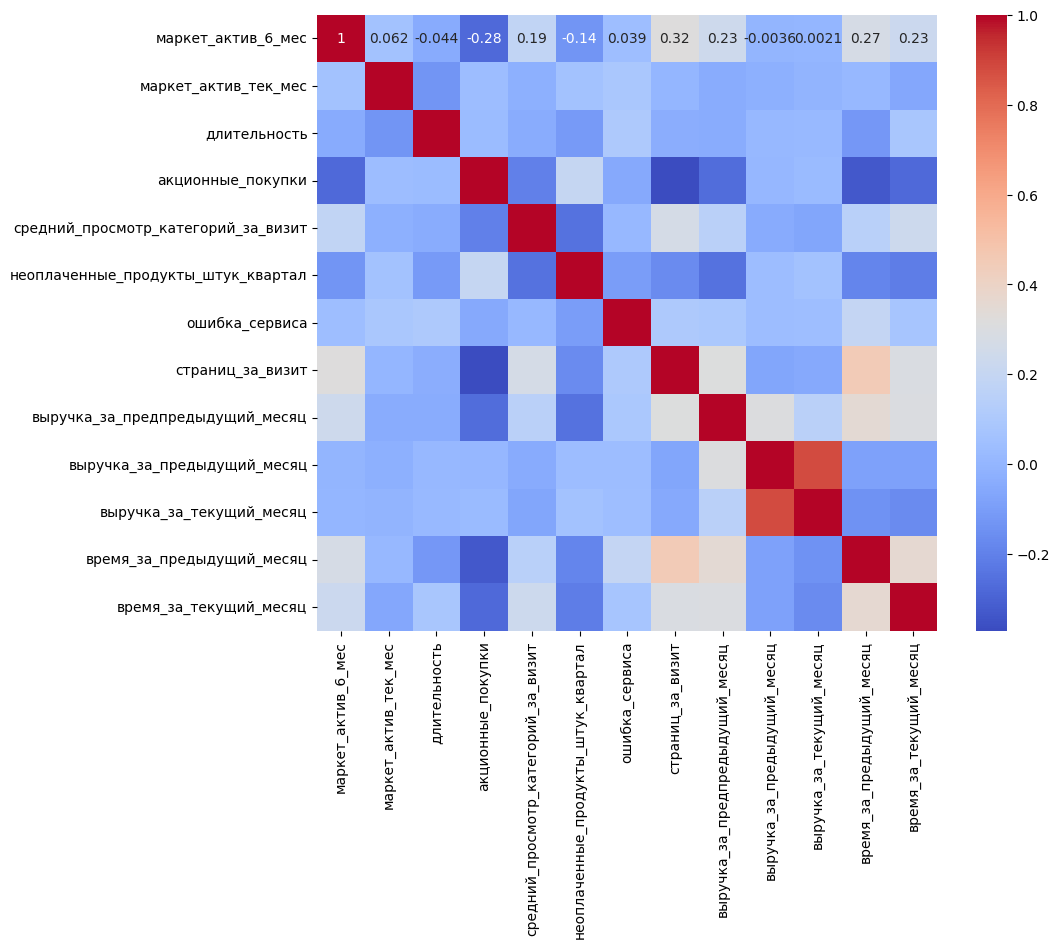

In [71]:
num_cols = (market_file.select_dtypes(include=['int', 'float'])).columns
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(market_file[num_cols].corr(method='spearman'), annot=True, cmap='coolwarm') 

Значимо коррелируют между собой столбцы `выручка_за_предыдущий_месяц` и `выручка_за_текущий_месяц`, значение корреляции между ними составляет 0.88. Это высокая корреляция, которая, однако, не указывает на мультиколлинеарность этих признаков. Данные не требуют корректировки.

## Использование пайплайнов.

Одной из задач проекта является создание модели, которая будет предсказывать снижение покупательской активности клиентов. Обучим несколько моделей и выберем из них наиболее точную.

Разобьем данные на тренировочную и тестовую выборки. 

In [72]:
X = market_file.drop(['покупательская_активность'], axis=1)
y = market_file['покупательская_активность']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=RANDOM_STATE,
                                                    stratify=y)

Категории покупательской активности в наших данных не сбалансированы. Оценим, как распределились значения целевой переменной в тренировочной выборке.

In [73]:
y_train.value_counts()

покупательская_активность
прежний_уровень    602
снизилась          370
Name: count, dtype: int64

Данные немного несбалансированы: категория "Прежний уровень" встречается чаще, чем категория "Снизилась". Такое распределение не является критичным, однако наименьшим числом наблюдений представлена мажорная категория целевой переменной: в нашем исследовании необходимо, чтобы модель максимально точно определяла клиентов, чья покупательская активность снизится. Чтобы повысить точность модели, воспользуемся методом RandomOverSampler для балансировки данных: увеличим количество наблюдений со значением покупательской активности "снизилась" в тренировочной выборке.

Закодируем целевую переменную.

In [74]:
labels = ['снизилась', 'прежний_уровень']
label_encoder = LabelEncoder()
label_encoder.classes = np.array(labels) 

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [75]:
y_train[:5]

array([1, 0, 0, 1, 0])

In [76]:
label_encoder.inverse_transform(y_train[:5])

array(['снизилась', 'прежний_уровень', 'прежний_уровень', 'снизилась',
       'прежний_уровень'], dtype=object)

Выберем столбцы для кодирования и шкалирования данных.

In [77]:
ohe_columns = ['разрешить_сообщать',
               'популярная_категория']
ord_columns = ['тип_сервиса']
num_columns = ['маркет_актив_6_мес',
               'маркет_актив_тек_мес',
               'длительность',
               'акционные_покупки',
               'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал',
               'ошибка_сервиса',
               'страниц_за_визит',
               'выручка_за_предпредыдущий_месяц',
               'выручка_за_предыдущий_месяц',
               'выручка_за_текущий_месяц',
               'время_за_предыдущий_месяц',
               'время_за_текущий_месяц']

Прогнозирование значения покупательской активности - задача бинарной классификации. Для ее решения обучим следующие модели классификации:
- Дерево решений,
- Метод k-ближайших соседей,
- Метод логистической регресии,
- Метод опорных векторов.

Категории покупательской активности в наших данных не сбалансированы. Оценим, как распределились значения целевой переменной в тренировочной выборке.

In [78]:
pd.Series(y_train).value_counts()

0    602
1    370
Name: count, dtype: int64

Данные немного несбалансированы: категория "Прежний уровень" встречается чаще, чем категория "Снизилась". Такое распределение не является критичным, однако наименьшим числом наблюдений представлена мажорная категория целевой переменной: в нашем исследовании необходимо, чтобы модель максимально точно определяла клиентов, чья покупательская активность снизится. Чтобы повысить точность модели, воспользуемся методом RandomOverSampler для балансировки данных: увеличим количество наблюдений со значением покупательской активности "снизилась" в тренировочной выборке.

Создадим пайплайн: обработаем и сбалансируем данные, создадим полиномиальные признаки для линейных моделей, выберем из них наиболее информативные. 

In [79]:
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))]
)

ord_pipe = Pipeline(
    [('simpleImputer_before_ord',
      SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',
      OrdinalEncoder(categories=[['стандарт', 'премиум']],
                     handle_unknown='use_encoded_value', unknown_value=np.nan)),
     ('simpleImputer_after_ord',
      SimpleImputer(missing_values=np.nan, strategy='most_frequent'))]
)

num_pipe = Pipeline(
    [('scaler',
      StandardScaler())]
)

data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', num_pipe, num_columns)], 
    remainder='passthrough'
) 

pipe_final = ImbPipeline([
    ('preprocessor', data_preprocessor),
    ('sampler', RandomOverSampler(random_state=RANDOM_STATE)),
    ('select', SelectKBest(score_func=f_classif)),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    {'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
     'models__max_depth': range(2, 5),
     'models__max_features': range(2, 5),
     'select__score_func': [mutual_info_classif],
     'select__k' : range(1, X_train.shape[1]+1),
     'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()]},
    
    {'models': [KNeighborsClassifier()],
     'models__n_neighbors': range(2, 5),
     'select__score_func': [mutual_info_classif],
     'select__k' : range(1, X_train.shape[1]+1),
     'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()]},
        
    {'models': [SVC()],
     'models__probability' : [True],
     'models__kernel': ['linear','poly', 'rbf', 'sigmoid'], 
     'models__C': np.arange(0.01, 0.5, 0.05),
     'models__gamma': np.arange(0.01, 0.5, 0.05),
     'models__degree': [2, 3],
     'select__score_func': [mutual_info_classif, f_classif],
     'select__k': range(1, X_train.shape[1]+1),
     'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler()]}
]

### Выберем лучшую модель.

Оценим точность моделей с выборочными комбинациями гиперпараметров методом кросс-валидации. 

Заказчику важно не упустить клиентов, чья покупательская активность имеет тенденцию к снижению, чтобы своевременно предпринять меры и не потерять постоянного клиента. При этом ложноположительная оценка клиентов, чья покупательская активность не будет снижаться также будет приводить к потерям для бизнеса: им будут предлагаться акции, без которых они все равно продолжили бы пользоваться сервисом. 

Поскольку приоритеты заказчика нам не известны, будем оценивать модель метрикой f1-score, которая рассчитает среднее гармоническое между precision и recall. В качестве метрики, оценивающей общую способность модели различать два класса, используем roc-auc score.

In [80]:
%%time 
scoring = {
    'roc_auc_score': 'roc_auc',
    'f1_score': 'f1'
}
randomized_search = RandomizedSearchCV( 
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=scoring,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=60,
    refit='f1_score'
)

randomized_search.fit(X_train, y_train)

best_index = randomized_search.best_index_

best_scores = {
    'roc_auc_score': randomized_search.cv_results_['mean_test_roc_auc_score'][best_index],
    'f1_score': randomized_search.cv_results_['mean_test_f1_score'][best_index]
}

display('Лучшая модель и её параметры:', randomized_search.best_estimator_)
display('Значения метрик для лучшей модели:', best_scores)

y_pred = randomized_search.predict(X_test)
proba_preds = randomized_search.predict_proba(X_test)[:, 1]

display(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, proba_preds)}')
display(f'Метрика f1_score на тестовой выборке: {f1_score(y_test, y_pred)}')

'Лучшая модель и её параметры:'

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_or...
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит',
                                                   'выручка_за_предпредыдущий_месяц',
                                                   'выручка_за_предыдущий_месяц',
                                                   'выручка_за_текущий_месяц',
                                                   'время_за_предыдущий_месяц',
                                                   'время_за_текущий_месяц'])])),
                ('sampler', RandomOverSampler(random_state=77)),
                ('select', SelectKBest()),
                ('models',
                 SVC(C=0.41000000000000003, degree=2, gamma=0.46,
                     probability=True))])

'Значения метрик для лучшей модели:'

{'roc_auc_score': 0.919791713200804, 'f1_score': 0.8466352655296238}

'Метрика ROC-AUC на тестовой выборке: 0.8913306451612903'

'Метрика f1_score на тестовой выборке: 0.828828828828829'

CPU times: total: 2.27 s
Wall time: 13.6 s


Лучшей оказалась модель основанная на методе опорных векторов. На основе одиннадцати отобранных признаков модель достаточно точно присваивает метки классов: ошибочные предсказания занимают около 10%. Метрика f1-score также указывает на достаточно точное определение классов моделью. Построим матрицу ошибок и оценим, одинаково ли точно она определяет оба класса.

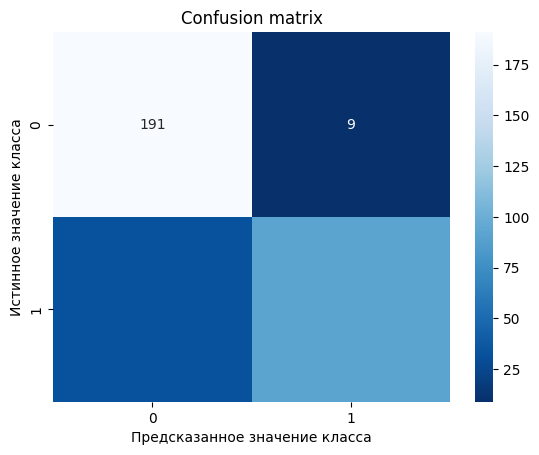

In [81]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues_r')
plt.title('Confusion matrix')
plt.ylabel('Истинное значение класса')
plt.xlabel('Предсказанное значение класса'); 

Модель точнее определяет минорный класс, построим кривые precision и recall и подберем порог классификации лучшей модели так, чтобы модель с одинаковым успехом определяла оба класса.

### Донастройка лучшей модели.

In [82]:
model = randomized_search.best_estimator_

In [83]:
precision, recall, thresholds = precision_recall_curve(y_test, proba_preds)

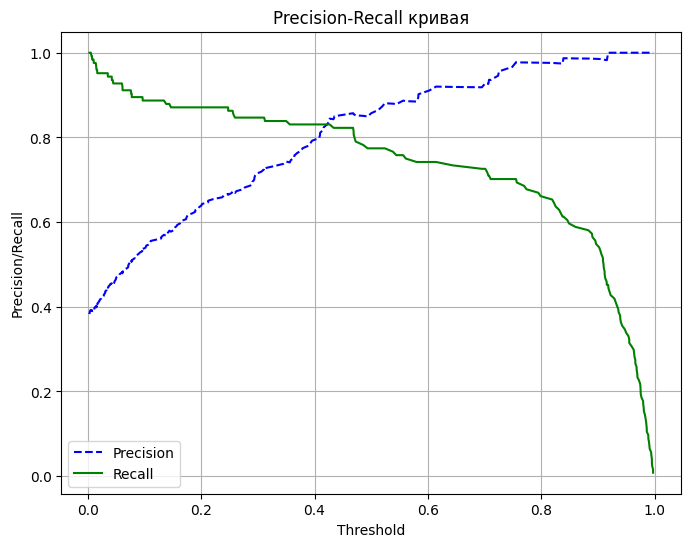

In [84]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision-Recall кривая")
plt.legend()
plt.grid()
plt.show()

Наиболее гармоничные по точности прогнозные значения модель дает при пороге 0.42. Применим это значение для нашей модели. Сравним выбранные метрики до и после изменения порогового значения.

In [85]:
display(f'Метрика roc_auc базовой модели: {roc_auc_score(y_test, proba_preds)}')
display(f'Метрика f1 базовой модели: {f1_score(y_test, y_pred)}')
display(f'Метрика precision базовой модели: {precision_score(y_test, y_pred)}')
f'Метрика recall базовой модели: {recall_score(y_test, y_pred)}'

'Метрика roc_auc базовой модели: 0.8897983870967742'

'Метрика f1 базовой модели: 0.8177777777777777'

'Метрика precision базовой модели: 0.9108910891089109'

'Метрика recall базовой модели: 0.7419354838709677'

In [86]:
threshold = 0.42
y_pred = (proba_preds >= threshold).astype(int)

In [87]:
display(f'Метрика roc_auc донастроенной модели: {roc_auc_score(y_test, proba_preds)}')
display(f'Метрика f1 донастроенной модели: {f1_score(y_test, y_pred)}')
display(f'Метрика precision донастроенной модели: {precision_score(y_test, y_pred)}')
f'Метрика recall донастроенной модели: {recall_score(y_test, y_pred)}'

'Метрика roc_auc донастроенной модели: 0.8897983870967742'

'Метрика f1 донастроенной модели: 0.8306451612903226'

'Метрика precision донастроенной модели: 0.8306451612903226'

'Метрика recall донастроенной модели: 0.8306451612903226'

При пороге классификации 0.42 метрики precision и recall уравнялись, а значение метрики f1 возросло. Изучим матрицу ошибок обновленной модели.

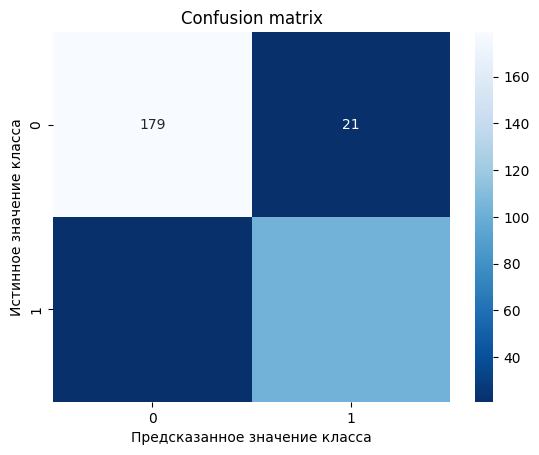

In [88]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues_r')
plt.title('Confusion matrix')
plt.ylabel('Истинное значение класса')
plt.xlabel('Предсказанное значение класса'); 

Модель все еще совершает ошибки, но теперь делает это более равномерно для обоих классов.

## Анализ важности признаков.

Оценим, какие признаки модель выбрала в качестве наиболее важных для предсказания покупательской активности.

Еще раз ознакомимся с лучшей моделью и ее параметрами.

In [210]:
randomized_search.best_params_

{'select__score_func': <function sklearn.feature_selection._mutual_info.mutual_info_classif(X, y, *, discrete_features='auto', n_neighbors=3, copy=True, random_state=None)>,
 'select__k': 11,
 'preprocessor__num__scaler': StandardScaler(),
 'preprocessor__num__poly__degree': 1,
 'models__probability': True,
 'models__kernel': 'rbf',
 'models__gamma': 0.36000000000000004,
 'models__degree': 3,
 'models__C': 0.26,
 'models': SVC(C=0.26, gamma=0.36000000000000004, probability=True)}

Нашей прогнозной моделью является SVC с ядром радиальной базисной функции, при этом модель работает на уже отобранных признаках. Чтобы оценить важность каждого из этих признаков, используем метод SHAP. Прежде чем передать наши данные в метод, трансформируем их также, как это было сделано в пайплайне и задаим незакодированные наименования столбцов, чтобы иметь возможность оценить их важность.

In [211]:
X_train_transformed = randomized_search.best_estimator_.named_steps['preprocessor'].transform(X_train)
feature_names = randomized_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names)

Выберем 11 признаков, которые использовались при обучении модели в пайплайне, для этого используем метод SelectKBest с необходимыми параметрами. Так же сохраним незакодированные наименования столбцов.

In [212]:
selector = randomized_search.best_estimator_.named_steps['select']
X_train_selected = selector.transform(X_train_transformed)
feature_names_selected = feature_names[selector.get_support()]

X_train_selected_df = X_train_transformed_df[feature_names_selected]

В тренировочной выборке, на которой обучалась модель 1204 наблюдения.

In [213]:
X_train_selected_df.shape

(972, 11)

Чтобы оптимизировать время вычислений методом SHAP, и, при этом, не потерять репрезентативность выборки, передадим в метод 20% случайно выбранных данных.

In [214]:
X_train_sample = shap.sample(X_train_selected_df, round(X_train_selected_df.shape[0] * 0.2), random_state=RANDOM_STATE)
decision_function = randomized_search.best_estimator_.named_steps['models'].decision_function
explainer = shap.Explainer(decision_function, X_train_sample)

In [95]:
shap_values = explainer(X_train_sample)

PermutationExplainer explainer: 195it [09:14,  2.89s/it]                                                               


Изучим результаты оценки признаков.

In [96]:
X_train_selected_df.columns

Index(['ohe__популярная_категория_косметика_и_аксессуары',
       'ohe__популярная_категория_кухонная_посуда',
       'ohe__популярная_категория_мелкая_бытовая_техника_и_электроника',
       'ohe__популярная_категория_техника_для_красоты_и_здоровья',
       'ohe__популярная_категория_товары_для_детей', 'ord__тип_сервиса',
       'num__маркет_актив_6_мес', 'num__акционные_покупки',
       'num__средний_просмотр_категорий_за_визит',
       'num__неоплаченные_продукты_штук_квартал', 'num__ошибка_сервиса',
       'num__страниц_за_визит', 'num__выручка_за_предпредыдущий_месяц',
       'num__выручка_за_текущий_месяц', 'num__время_за_предыдущий_месяц',
       'num__время_за_текущий_месяц'],
      dtype='object')

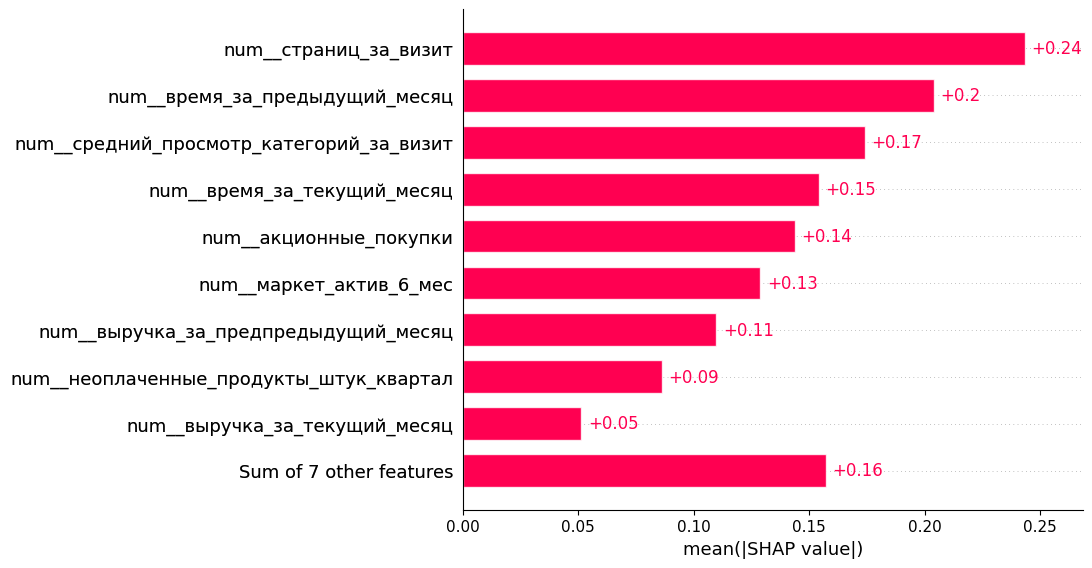

In [97]:
shap.plots.bar(shap_values)

В качестве наиболее важных для прогноза покупательской активности признаков модель испульзует категории, описывающите поведение клиента на сайте: значения количества страниц за визит и времени, проведенном на сайте в предыдущем и текущем месяце. 

Признаки, описывающие продуктовое поведение покупателя - среднее число категорий, просмотренных за визит, доля акционных покупок и число неоплаченных покупок в корзине за последние три месяца.

Среди важных для предсказания покупательской активности признаков модель также учитывает количество маркетинговых коммуникаций с клиентом за последние 6 месяцев, а также данные о выручке, полученной от клиента за тпредыдущий и предпредыдущий месяцы.

Из отобранных признаков наименее важными (но, при этом, релевантными для прогноза) оказались значения выручки в текущем месяце и и количество дней с момента регистрации покупателя на сайте. 

Таким образом, данные о поведении клиента на сайте и его продуктовом поведении в наибольшей степени отражают покупательскую активность клиента. 

Изучим более детально, как значения описанных признаков сказываются на предсказании модели.

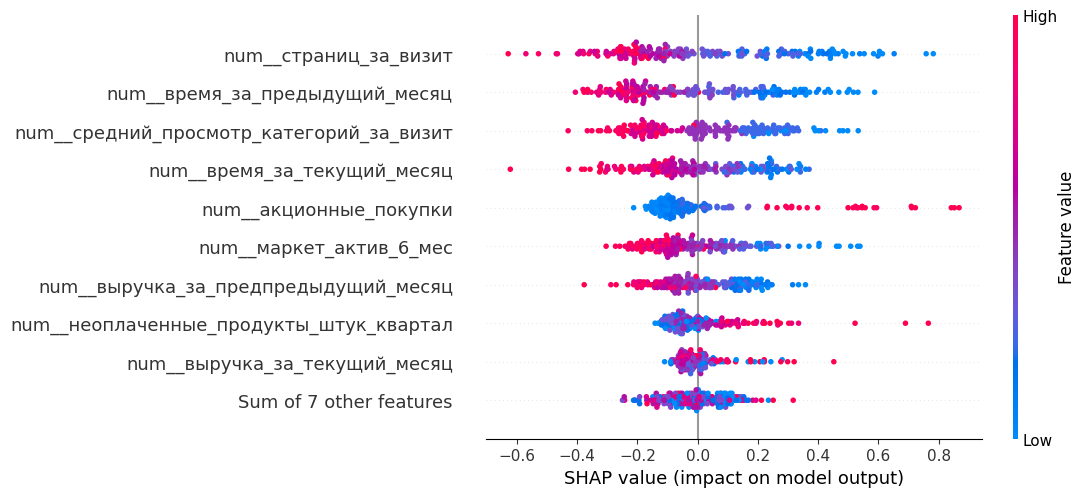

In [98]:
shap.plots.beeswarm(shap_values) 

**1) Поведение на сайте:**
- **Количество просмотренных страниц за визит:** высокие значения признака указывают на сохранение поупательской активности, низкие - на снижение.
- **Время проведенное на сайте в предыдущем месяце:** высокие значения указывают на сохранение поупательской активности, низкие - на снижение.
- **Время проведенное на сайте в текущем месяце:**  высокие - сохранится, низкие - снизится, но уже не так сильно влияют

Высокие значения признаков, описывающих поведение клиента на сайте говорят о сохранении покупательской активности клиента. Низкая активность на сайте - низкая покупательская активность.

Если клиент активно пользуется сайтом в течение последних месяцев и ознакамливается с большим количеством товара, его покупательская активность вероятнее всего сохранится. Обратные данные указывают на потенциальное снижение покупательской активности.

**2) Продуктовое поведение:**
- **Количество просмотренных категорий за визит:** высокие значения признака указывают на сохранение поупательской активности, низкие - оказывают меньшее влияние на целевую переменную, однако склоняют ее к категории "снизится".
- **Доля акционных покупок:** высокие значения признака указывают на снижение покупательской активности, высокие также оказывают меньшее влияние на прогноз, но все же склоняют его к категории "сохранится".
- **Количество неоплаченнх продукты в корзине:** высокие значения указывают на снижение покупательской активности, низкие - на сохранение.

Если клиент просматривает различные категории за визит, откладывает из в корзину, но не совершает покупок, либо совершает покупки только в период действия акции на интересующий товар, его покупательская активность вероятнее всего снизится.

**3) Коммуникация с клиентом:**
- **Число маркетиговых коммуникаций с клиентом за 6 месяцев:**  высокие высокие значения признака указывают на сохранение покупательской активности, низкие - на снижение.
Маркетинговые коммуникации способны положительно повлиять на покупательскую активность клиента.


**4) Финансовое поведение:**
- **Выручка за предпредыдущий месяц:** высокие высокие значения признака указывают на сохранение покупательской активности, низкие - на снижение.
- **Выручка за предыдущий месяц:** наблюдения сгруппировоны у оси достаточно диффузно,влияние на целевую переменную минимально.

Эти показатели согласуются с оценкой поделью параметров продуктового поведения клиента. Низкие значения выручки (так как клиент либо не совершал покупок и откладывал товары в корзину, либо совершал продукты редко, только в период действия акции) указывают на возможное снижение покупательской активности.

## Сегментация покупателей.

На предыдущем этапе мы выделили основные признаки, которые говорят о потенциальном снижении покупательской активности у клиента: 
- Низкие значения активности клиента на сайте: малое количество времени, проведенного на сайте и просмотров товаров.
- Большое число просмотренных категорий за один визит при предпочтении покупок по акции и большое количество продуктов в корзине.

На основе этих двух паттернов поведения клиентов и будут строиться наши дальнейшие рекомендации.

Для начала, объединим тестовые данные, предсказанные донастроенной моделью значения целевой переменной и значения расстояния до гиперплоскости, разделяющей классы в один датафрейм.

In [89]:
test_data = pd.concat([X_test.reset_index(), pd.DataFrame({'покупательская_активность' : y_pred}),\
                      pd.DataFrame({'predict_proba' : proba_preds})], axis=1)

Добавим данные о прибыли.

In [90]:
test_data = test_data.merge(money, on='id', how='left')

In [91]:
test_data.head()

,id,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_за_предпредыдущий_месяц,выручка_за_предыдущий_месяц,выручка_за_текущий_месяц,время_за_предыдущий_месяц,время_за_текущий_месяц,покупательская_активность,predict_proba,прибыль
0,215630,стандарт,нет,3.8,3.0,388.0,0.21,косметика_и_аксессуары,2.0,7.0,2.0,2.0,4583.0,5559.5,5810.4,15.0,14.0,1,0.968131,3.77
1,216556,стандарт,нет,4.8,5.0,372.0,0.25,косметика_и_аксессуары,1.0,6.0,7.0,7.0,4521.0,4497.0,4606.2,18.0,8.0,0,0.379000,4.97
2,215827,стандарт,да,4.6,3.0,641.0,0.30,косметика_и_аксессуары,4.0,1.0,5.0,6.0,4900.0,5108.5,5419.2,21.0,11.0,0,0.035138,2.99
3,216531,стандарт,да,4.9,4.0,780.0,0.24,кухонная_посуда,4.0,4.0,1.0,17.0,4946.0,4878.5,4950.0,14.0,14.0,0,0.017377,4.19
4,216490,стандарт,да,4.8,4.0,832.0,0.24,мелкая_бытовая_техника_и_электроника,3.0,1.0,5.0,8.0,5538.0,4623.0,3960.0,19.0,11.0,0,0.196368,3.70


Проверим обновленную таблицу на наличие пропусков

In [92]:
test_data.isna().sum()

id                                     0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_за_предпредыдущий_месяц        0
выручка_за_предыдущий_месяц            0
выручка_за_текущий_месяц               0
время_за_предыдущий_месяц              0
время_за_текущий_месяц                 0
покупательская_активность              0
predict_proba                          0
прибыль                                0
dtype: int64

Пропуски отсутствуют. 

Выделим клиентов, покупательская активность которых наиболее вероятно снизится. Пороговое значение нашей модели было смещено в процессе донастройки и равняется -0.2.

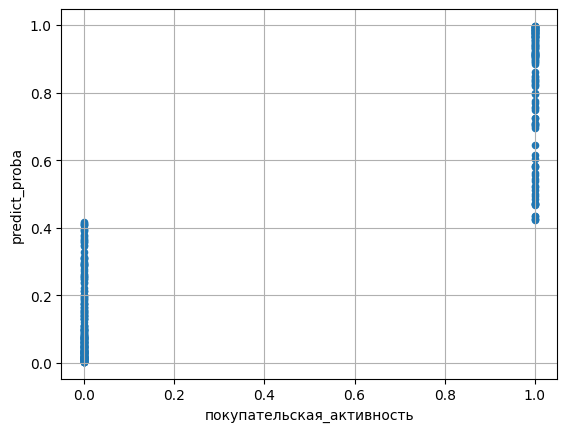

In [93]:
test_data.plot(kind='scatter', x='покупательская_активность', y='predict_proba')
plt.grid()
plt.show()

In [94]:
test_data.shape

(324, 20)

In [95]:
target_data = test_data[test_data['predict_proba'] > 0.41]
target_data.shape

(126, 20)

Мы выделили группу, клиентов, чья покупательская активность вероятнее всего снизится.  Эти клиенты составляют чуть более трети от общего числа клиентов: 123 клиента из 324.

### Клиенты, покупательская активность которых вероятнее всего снизится и которые дали согласие на коммуникацию с сервисом.

В процессе анализа вклада каждой категории в предсказанное значение целевой переменной мы отметили, что высокие значения числа макретинговых коммуникаций с клиентом положительно сказываются на покупательской активности. Следует использовать эти данные как основной инструмент, посредством которого сервис может оказывать влияние на клиентов. Таким образом, покупатели, давшие согласие на оповещение о проводящихся акциях на товары могут быть наименее затратно возвращены к пользованию сервисом.

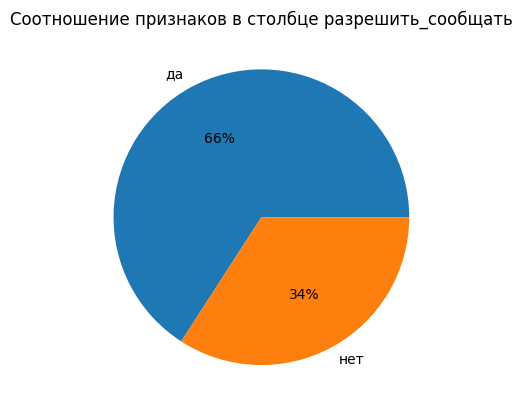

разрешить_сообщать
да     83
нет    43
Name: count, dtype: int64

In [96]:
cat_cols_analysis(target_data, 'разрешить_сообщать')

Как мы видим, это большая часть наших целевых клиентов. Узнаем, какие категории товаров пользуются наибольшим спросом среди этой группы покупателей.

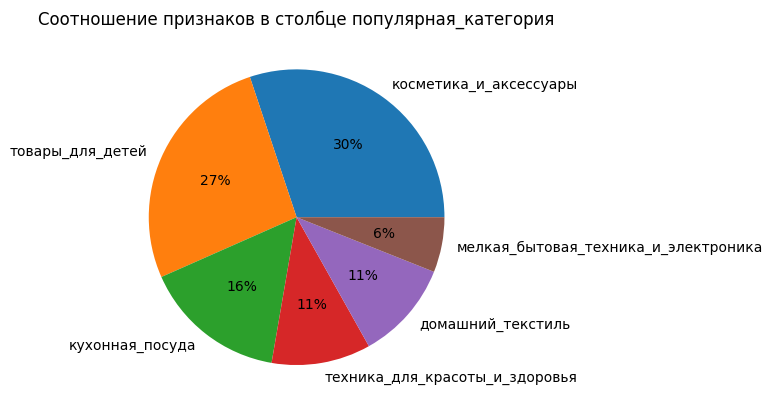

популярная_категория
косметика_и_аксессуары                  25
товары_для_детей                        22
кухонная_посуда                         13
техника_для_красоты_и_здоровья           9
домашний_текстиль                        9
мелкая_бытовая_техника_и_электроника     5
Name: count, dtype: int64

In [97]:
cat_cols_analysis(target_data[target_data['разрешить_сообщать'] == 'да'], 'популярная_категория')

Данной группе клиентов можно предложить более выгодные условия покупки товаров из категорий "косметика_и_аксессуары" и "товары_для_детей". В этих категориях представлены товары повседневного спроса, такое предложение вероятнее всего ответит интересам этой группы клиентов.

Однако данная рекомендация позволит лишь разово получить часть прибыли с постоянных клиентов. Согласно логике нашей модели, гораздо важнее, чтобы клиенты проводили время на сайте и просматривали страницы с товарами. Таким образом, предложение скидок на интересующие категории товаров может стать эффективным шагом  для привлечения клиента к сервису, если при этом клиентам будут предложены пресонализированные рекомендации товаров из той же или других категорий. 

Номера id клиентов, которым будет интересно такое предложение:

In [98]:
list(target_data[(target_data['разрешить_сообщать'] == 'да') &
                 ((target_data['популярная_категория'] == 'товары_для_детей') |
                  (target_data['популярная_категория'] == 'косметика_и_аксессуары'))]['id'])

[215747,
 216009,
 215598,
 215923,
 215471,
 215684,
 215937,
 215436,
 215490,
 215741,
 215711,
 215437,
 215610,
 215399,
 215657,
 215527,
 215655,
 216383,
 215468,
 215560,
 216421,
 216566,
 215551,
 215734,
 215603,
 215666,
 215402,
 215820,
 215727,
 215656,
 215456,
 215668,
 215426,
 215487,
 215410,
 215707,
 215715,
 215625,
 215642,
 215525,
 215354,
 215481,
 215384,
 215669,
 215909,
 215667,
 215559]

### Клиенты, которые имеют большое число отложенных в корзину товаров и чаще всего совершают покупки по акции.

Как мы уже отмечали, наиболее важными факторами в сохранении покупательской активности являются поведение клиента на сайте и его продуктовое поведение. Сервису стоит стимулировать клиентов проводить время на сайте и просматривать старицы товаров. 

Однако часть клиентов демонстрирует определенный паттерн покупательского поведения: имеют большое число товаров в корзине и большую долю покупок по акции. Оба этих признака, согласно нашей модели, свидетельствуют о потенциальном снижении покупательской активности. Выделим эту группу клиентов.

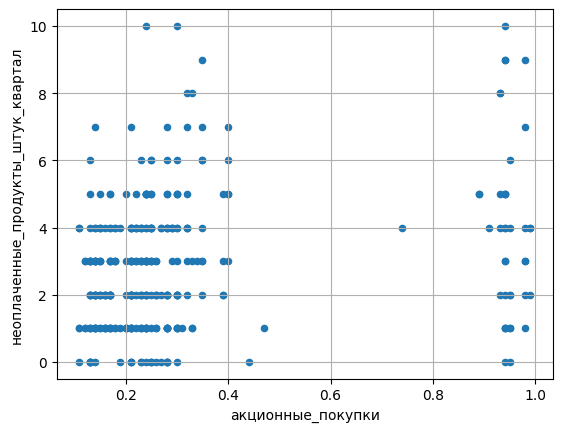

In [99]:
test_data.plot(kind='scatter', x='акционные_покупки', y='неоплаченные_продукты_штук_квартал')
plt.grid()

Выделим группу клиентов, которые имеют более четырех продуктов в корзине, а доля акционных покупок составляет 0.6 и выше.

In [100]:
len(target_data[(target_data['акционные_покупки'] >= 0.6) & 
    (target_data['неоплаченные_продукты_штук_квартал'] >= 4)])

23

В нашей выборке таких клиентов 23. Также рассмотрим популярные категории этих клиентов.

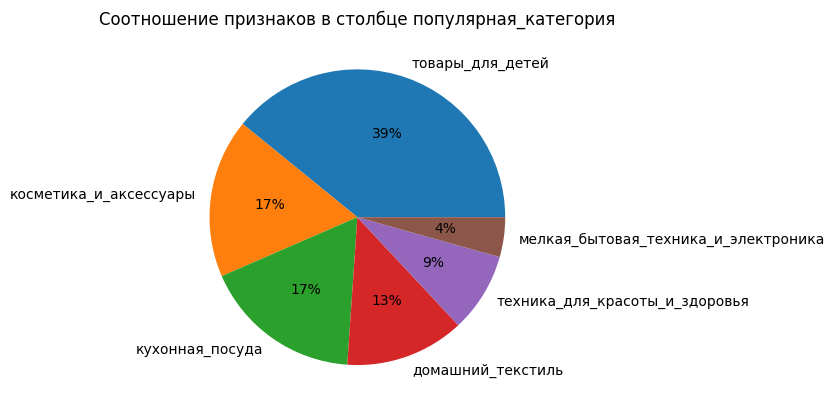

популярная_категория
товары_для_детей                        9
косметика_и_аксессуары                  4
кухонная_посуда                         4
домашний_текстиль                       3
техника_для_красоты_и_здоровья          2
мелкая_бытовая_техника_и_электроника    1
Name: count, dtype: int64

In [101]:
cat_cols_analysis(target_data.query('акционные_покупки >= 0.6 and неоплаченные_продукты_штук_квартал >= 4'), 'популярная_категория')

Клиенты в этом сегменте так же чаще всего интересуются категориями "товары_для_детей" и "косметика_и_аксессуары", однако в данном случае сервису следует обратить внимание на отложенные в корзину товары: с учетом высокой доли покупок по акции, вероятно, эти клиенты сильнее прочих стремятся сэкономить. 

В настоящем исследовании у нас нет данных о категорях товаров, которые клиенты отложили в корзину. Такая информация дала бы возможность точнее проанализировать особенности покупательского поведения клиентов в этом сегменте.

В данном случае более эффективным будет настроить персональные рекомендации, которые будут предлагать товары, аналогичные тем, что лежат у клиентов в корзине, но по более низкой стоимости. Во-первых, это повысит шанс совершения покупки клиентом, во-вторых такие рекомендации побудят клиента к более тщательному поиску товаров, и, как следствие, более активному использованию сервиса.

Номера id клиентов, к которым применима описанная стратегия:

In [102]:
list(target_data[(target_data['акционные_покупки'] >= 0.6) & (target_data['неоплаченные_продукты_штук_квартал'] >= 4)]['id'])

[215747,
 215598,
 215577,
 215436,
 215741,
 215655,
 215468,
 215502,
 215723,
 215696,
 215516,
 215705,
 215820,
 215362,
 215668,
 215410,
 215612,
 215625,
 216357,
 215421,
 215481,
 216510,
 215667]

### Клиенты, которые приносили сервису наибольшую прибыль последние три месяца.

Далее, сосредоточимся на клиентах с точки зрения прибыли. Модель выделила данные о выручке за предпредыдущий и предыдущий месяцы как важные для прогнозирования покупательской активности. Изучим сравнительную гистограмму значений прибыли от за последние три месяца.

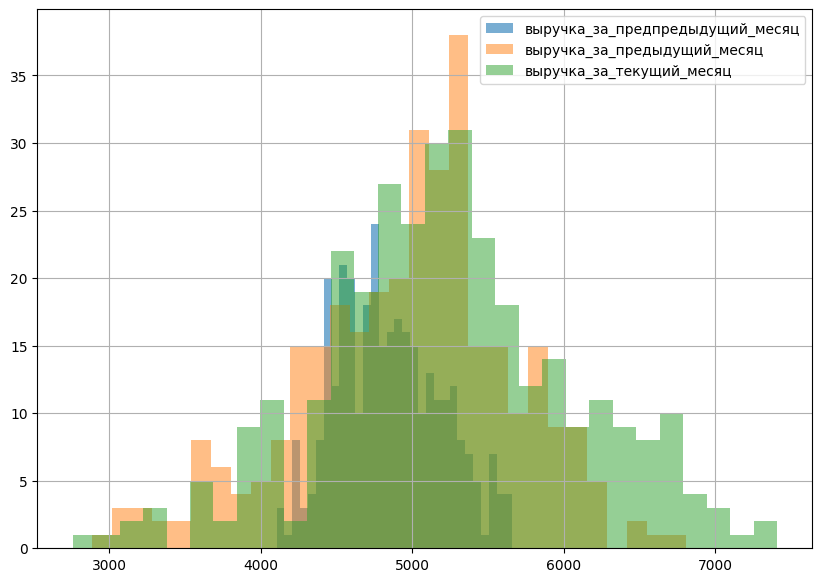

In [103]:
test_data['выручка_за_предпредыдущий_месяц'].hist(bins=30, alpha=0.6, legend=True, figsize=(10, 7))
test_data['выручка_за_предыдущий_месяц'].hist(bins=30, alpha=0.5, legend=True)
test_data['выручка_за_текущий_месяц'].hist(bins=30, alpha=0.5, legend=True)
plt.legend(['выручка_за_предпредыдущий_месяц', 'выручка_за_предыдущий_месяц', 'выручка_за_текущий_месяц'])
plt.show()

Значения прибыли за предпредыдущий месяц имеют наименьший размах, а распределение данных за текущий месяц смещено в сторону больших значений прибыли. Рассмотрим, какие категории были популярны в различные периоды у клиентов, приносивших наиболее высокую прибыль. Таким образом выявим наиболее прибыльные категории товаров.

'Предпредыдущий месяц:'

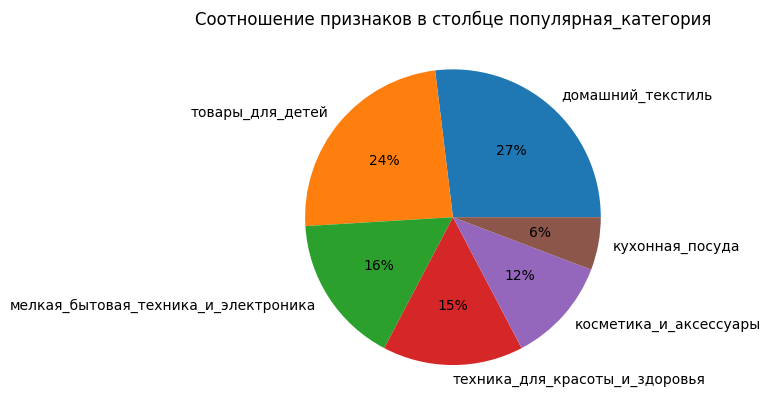

популярная_категория
домашний_текстиль                       28
товары_для_детей                        25
мелкая_бытовая_техника_и_электроника    17
техника_для_красоты_и_здоровья          16
косметика_и_аксессуары                  12
кухонная_посуда                          6
Name: count, dtype: int64

In [104]:
display('Предпредыдущий месяц:')
cat_cols_analysis(test_data.query("выручка_за_предпредыдущий_месяц > 5000"), "популярная_категория")

'Предыдущий месяц:'

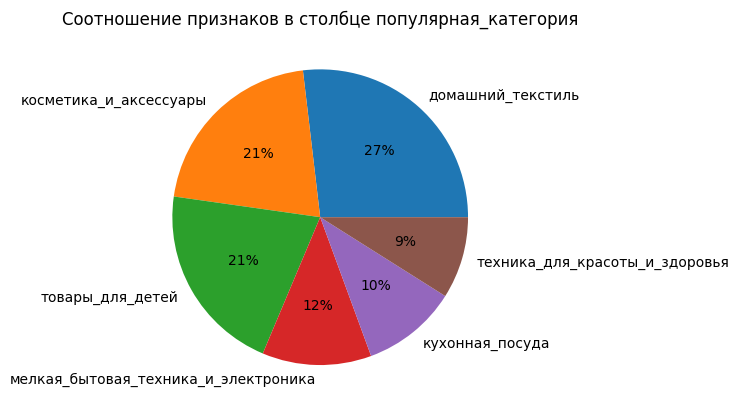

популярная_категория
домашний_текстиль                       18
косметика_и_аксессуары                  14
товары_для_детей                        14
мелкая_бытовая_техника_и_электроника     8
кухонная_посуда                          7
техника_для_красоты_и_здоровья           6
Name: count, dtype: int64

In [105]:
display('Предыдущий месяц:')
cat_cols_analysis(test_data.query('выручка_за_предыдущий_месяц > 5500'), 'популярная_категория')

'Текущий месяц:'

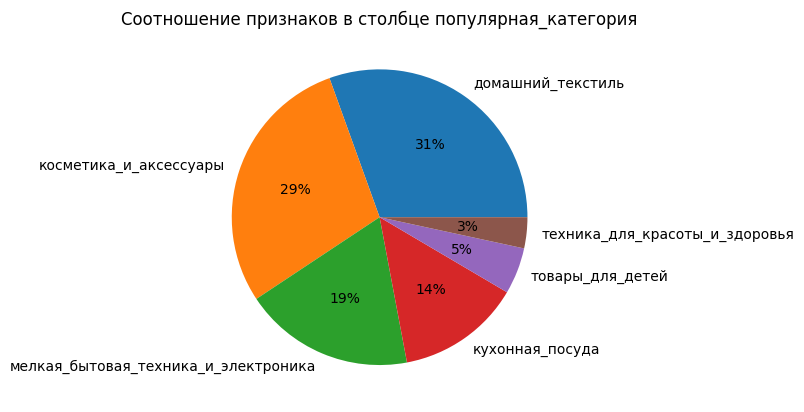

популярная_категория
домашний_текстиль                       18
косметика_и_аксессуары                  17
мелкая_бытовая_техника_и_электроника    11
кухонная_посуда                          8
товары_для_детей                         3
техника_для_красоты_и_здоровья           2
Name: count, dtype: int64

In [106]:
display('Текущий месяц:')
cat_cols_analysis(test_data.query('выручка_за_текущий_месяц > 6000'), 'популярная_категория')

Наиболее популярная категория среди клиентов, приносивших наибольшую прибыль за все три исследуемых периода - "домашний текстиль". Почти треть наиболее выгодных клиентов предпочитают товары этой категории. 

Другими прибыльными категориями товаров оказались:

- В предпредыдущем месяце - "товары для детей" и "мелкая бытовая техника и электроника".
- В предыдущем месяце - "косметика и аксессуары" и "товары для детей".
- В текущем месяце - "косметика и аксессуары" и "мелкая бытовая техника и электроника".

Наша модель отметила связь между значениями выручки и вероятностью снижения покупательской активности. Из наиболее популярных категорий, "товары для детей" и "косметика и аксессуары" являются товарами повседневного спроса. Если в рекомендациях клиенту предлагать товары этих категорий, вероятно, для клиентов такое предложение будет актуальным, а сервис увеличит продажи товаров наиболее прибыльных категорий. Товары категории "мелкая бытовая техника и аксессуары " и "домашний текстиль" не требуют регулярных покупок, однако прибыль от продажи этих товаров будет максимальной. В данном случае, при составлении рекомендаций клиентам, можно сделать упор на товары сезонного спроса (например, текстить с летним/ зимним принтом, портативные вентиляторы/обогреватели), чтобы увеличить продажи товаров наиболее прибыльных категорий.

### Выводы о сегментах.

Итак, мы рассмотрели три сегмента покупателей:

**1) Клиенты, покупательская активность которых вероятнее всего снизится и которые дали согласие на коммуникацию с сервисом.**

Мы выяснили, что количество маркетинговых коммуникаций положительно влияет на покупательскую активность. Рекомендуем использовать это для удержания клиентов. Покупателям, согласившимся на оповещения, можно предложить выгодные условия на товары наиболее востребованных в этом сегменте категорий: "косметика и аксессуары" и "товары для детей". Однако эта стратегия обеспечит лишь краткосрочную прибыль. Следует стимулировать клиентов проводить больше времени на сайте и просматривать товары посредством персонализированных рекомендаций - так вероятность того, что клиенты будут активно пользоваться сервисом возрастет.

**2) Клиенты, которые имеют большое число отложенных в корзину товаров и чаще всего совершают покупки по акции.**

Эти клиенты также чаще всего интересуются категориями "товары для детей" и "косметика и аксессуары". 
Важно учитывать отложенные в корзину товары, так как продуктовое поведение клиентов этого сегмента указывает на их стремление к экономии. 

Эффективной стратегией будет предлагать персональные рекомендации с товарами аналогичные тем, что лежат у клиентов в корзине, но по более низкой стоимости: это повысит шанс совершения покупки клиентом, и простимулирует клиента к более тщательному поиску товаров, и, как следствие, более активному использованию сервиса.

У нас нет данных по категориям товаров в корзине. Дополнительное исследование с этой информацией помогло бы лучше понять продуктовое поведение клиентов в этом сегменте и точнее подобрать стратегию, стимулирующую клиентов пользоваться сервисом.

**3) Клиенты, которые приносили сервису наибольшую прибыль последние три месяца.**

Наиболее прибыльная категория среди клиентов, приносивших наибольшую прибыль во все периоды — "домашний текстиль", предпочитаемая почти третью выгодных клиентов. Другие популярные категории в этом сегменте - "товары для детей", "косметика и аксессуары" и "мелкая бытовая техника и электроника"

"Товары для детей", "косметика и аксессуары"— категории повседневного спроса, выгодные условия покупки этих товаров наиболее вероятно принесут сервису прибыль.
"Мелкая бытовая техника" и "домашний текстиль" менее часты в покупках, но также приносят высокую прибыль. Для этих товаров можно предлагать сезонные продукты, чтобы увеличить продажи в наиболее прибыльных категориях.

## Общий вывод.
Задачей проекта было составление персонализированных предложений постоянным клиентам сервиса "В один клик", чтобы сохранить их покупательскую активность.
Для решения задачи мы построили модель, которая предсказывает уровень покупательской активности на основе имеющихся у сервиса данных. Изучив логику модели, мы выделили признаки, которые влияют на уровень покупательской активности и разработали рекомендации в соответствии с ними.

Мы работали с данными клиентов сервиса, которые включали в себя информацию об их продуктовом поведении клиента, его поведении на сайте, финансовом поведении, и коммуникации с клиентом. 

На этапе предобоаботки мы проверили данные на наличие пропущенных значений, обработали явные и неявные дубликаты. 
Далее, ознакомились с данными на этапе исследовательского анализа: исследовали распределения данных, обработали аномальные значения и выбрали для обучения модели клиентов с покупательской активностью не менее трех месяцев.

Чтобы выбрать лучшую прогнозную модель, мы обучили несколько моделей для предсказания категориальной переменной:
- Дерево решений,
- Метод k-ближайших соседей,
- Метод логистической регресии,
- Метод опорных векторов.

Для каждой из них настроили параметры, которые сделают модель наиболее точной и выбрали модель, основываясь на ее общей точности и способности в равной степени предсказывать оба целевых класса. Оценив эти метрики при кросс-валидации с выборочными комбинациями параметров, мы выбрали лучшую модель: SVC с ядром радиальной функции.

Модель достаточно точно предсказывает классы (вероятность ошибки на тестовых данных - 14%). Проанализировав работу модели мы выделили признаки, которые указывают на снижение покупательской активности:

- Поведение на сайте: высокие показатели активности на сайте указывают на сохранение покупательской активности, низкие - на её снижение. 
- Продуктовое поведение: покупательская активность снизится, если клиент просматривает товары и откладывает в корзину, но не покупает, либо покупает только по акциям.
- Коммуникация с клиентом: маркетинговые коммуникации положительно влияют на покупательскую активность.
- Финансовое поведение: низкие значения выручки указывают на возможное снижение покупательской активности.

На основе этих признаков мы выделили три сегмента покупателей и составили рекомендации для их привлечения к сервису. Стратегия привлечения клиентов каждого рассмотренного сегмента будет строиться исходя из данных, предоставленных моделью: чтобы покупательская активность клиентов сохранялась на прежнем уровне, необходимо стимулировать клиентов активно пользоваться сервисом: просматривать различные товары и категории, совершать покупки.

1) Клиенты, покупательская активность которых вероятно снизится и которые дали согласие на коммуникацию с сервисом:

- Маркетинговые коммуникации положительно влияют на активность.
- Рекомендуется предлагать выгодные условия на популярные в этом сегменте категории: "косметика и аксессуары" и "товары для детей".
- Для долговременного удержания клиентов необходимо стимулировать их проводить больше времени на сайте через персонализированные рекомендации.

2) Клиенты с большим числом отложенных товаров в корзине и частыми покупками по акциям:

- Популярные категории товаров в сегменте - "товары для детей" и "косметика и аксессуары".
- Важно учитывать отложенные товары из-за склонности клиентов к экономии.
- Стратегия: предлагать аналогичные отложенным в корзину товары по более низкой стоимости для стимулирования покупок и активного использования сайта.
- Требуются дополнительные данные по категориям товаров в корзине для точной стратегии.

3) Клиенты, приносящие наибольшую прибыль за последние три месяца:

- Наиболее прибыльная категория — "домашний текстиль", а также "товары для детей", "косметика и аксессуары" и "мелкая бытовая техника и электроника".
- Выгодные условия покупки в повседневных категориях ("товары для детей" и "косметика и аксессуары") вероятно принесут прибыль.
- Для менее частых, но прибыльных категорий ("домашний текстиль" и "мелкая бытовая техника") рекомендуется предлагать сезонные продукты для увеличения продаж.